In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel, SelectKBest, chi2
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, accuracy_score, PredictionErrorDisplay, precision_score, precision_recall_curve, make_scorer, roc_curve, auc, f1_score
import sklearn.datasets as ds
from imblearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import statsmodels as sm
import pandas as pd
import seaborn as sns
import numpy as np
from imblearn.over_sampling import RandomOverSampler,SMOTE
import math
import statsmodels.api as sm
import shap
from scipy.stats import chi2_contingency
from scipy.stats.mstats import winsorize
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

import warnings
warnings.filterwarnings('ignore')

# Eksplorasi Data

In [ ]:
df = pd.read_csv("CS_data.txt", delimiter="\t")
df.head()

,ID_CLIENT,CLERK_TYPE,PAYMENT_DAY,APPLICATION_SUBMISSION_TYPE,QUANT_ADDITIONAL_CARDS,POSTAL_ADDRESS_TYPE,SEX,MARITAL_STATUS,QUANT_DEPENDANTS,EDUCATION_LEVEL,...,FLAG_HOME_ADDRESS_DOCUMENT,FLAG_RG,FLAG_CPF,FLAG_INCOME_PROOF,PRODUCT,FLAG_ACSP_RECORD,AGE,RESIDENCIAL_ZIP_3,PROFESSIONAL_ZIP_3,TARGET_LABEL_BAD.1
1,1,C,-99999,0,0,1,F,6,1,NaN,...,0,0,0,0,1,N,32,595,595,1
2,2,C,-99999,Web,0,1,F,2,0,NaN,...,0,0,0,0,1,N,34,230,230,1
3,3,C,-99999,0,0,1,F,2,0,NaN,...,0,0,0,0,1,N,27,591,591,0
4,4,C,-99999,Web,0,1,F,2,0,NaN,...,0,0,0,0,1,N,61,545,545,0
5,5,C,-99999,Web,0,1,M,2,0,NaN,...,0,0,0,0,1,N,48,235,235,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 1 to 50000
Data columns (total 54 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID_CLIENT                       50000 non-null  int64  
 1   CLERK_TYPE                      50000 non-null  object 
 2   PAYMENT_DAY                     50000 non-null  int64  
 3   APPLICATION_SUBMISSION_TYPE     50000 non-null  object 
 4   QUANT_ADDITIONAL_CARDS          50000 non-null  int64  
 5   POSTAL_ADDRESS_TYPE             50000 non-null  int64  
 6   SEX                             50000 non-null  object 
 7   MARITAL_STATUS                  50000 non-null  int64  
 8   QUANT_DEPENDANTS                50000 non-null  int64  
 9   EDUCATION_LEVEL                 826 non-null    float64
 10  STATE_OF_BIRTH                  50000 non-null  object 
 11  CITY_OF_BIRTH                   50000 non-null  object 
 12  NATIONALITY                     50000

In [ ]:
df.describe()

,ID_CLIENT,PAYMENT_DAY,QUANT_ADDITIONAL_CARDS,POSTAL_ADDRESS_TYPE,MARITAL_STATUS,QUANT_DEPENDANTS,EDUCATION_LEVEL,NATIONALITY,RESIDENCIAL_PHONE_AREA_CODE,RESIDENCE_TYPE,...,OCCUPATION_TYPE,MATE_PROFESSION_CODE,EDUCATION_LEVEL.1,FLAG_HOME_ADDRESS_DOCUMENT,FLAG_RG,FLAG_CPF,FLAG_INCOME_PROOF,PRODUCT,AGE,TARGET_LABEL_BAD.1
count,50000.000000,50000.000000,50000.0,50000.000000,50000.00000,50000.000000,826.000000,50000.000000,41788.000000,48651.000000,...,42687.000000,21116.000000,17662.000000,50000.0,50000.0,50000.0,50000.0,50000.000000,50000.00000,50000.000000
mean,25000.500000,-167.151640,0.0,1.006540,2.14840,0.650520,1.721550,0.961600,64.544223,1.252225,...,2.484316,3.797926,0.296003,0.0,0.0,0.0,0.0,1.275700,43.24852,0.260820
std,14433.901067,4239.371262,0.0,0.080606,1.32285,1.193655,0.448508,0.202105,38.511833,0.867833,...,1.532261,5.212168,0.955688,0.0,0.0,0.0,0.0,0.988286,14.98905,0.439086
min,1.000000,-99999.000000,0.0,1.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000,6.00000,0.000000
25%,12500.750000,10.000000,0.0,1.000000,1.00000,0.000000,1.000000,1.000000,29.000000,1.000000,...,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000,31.00000,0.000000
50%,25000.500000,10.000000,0.0,1.000000,2.00000,0.000000,2.000000,1.000000,68.000000,1.000000,...,2.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000,41.00000,0.000000
75%,37500.250000,15.000000,0.0,1.000000,2.00000,1.000000,2.000000,1.000000,100.000000,1.000000,...,4.000000,11.000000,0.000000,0.0,0.0,0.0,0.0,1.000000,53.00000,1.000000
max,50000.000000,25.000000,0.0,2.000000,7.00000,53.000000,2.000000,2.000000,126.000000,5.000000,...,5.000000,17.000000,5.000000,0.0,0.0,0.0,0.0,7.000000,106.00000,1.000000


## Cek Missing Value

In [ ]:
df.shape

(50000, 54)

In [ ]:
df.isna().mean() * 100

,0
ID_CLIENT,0.000
CLERK_TYPE,0.000
PAYMENT_DAY,0.000
APPLICATION_SUBMISSION_TYPE,0.000
QUANT_ADDITIONAL_CARDS,0.000
POSTAL_ADDRESS_TYPE,0.000
SEX,0.000
MARITAL_STATUS,0.000
QUANT_DEPENDANTS,0.000
EDUCATION_LEVEL,98.348


In [ ]:
df.dropna(axis="columns", thresh=0.9 * len(df), inplace=True)

In [ ]:
#identifikasi kategorikal dan numerical
categorical2_cols = df.select_dtypes(include=['object', 'category']).columns
numerical2_cols = [col for col in df.select_dtypes(include=['int64', 'float64']).columns if col not in categorical2_cols]

In [ ]:
categorical2_cols

Index(['CLERK_TYPE', 'APPLICATION_SUBMISSION_TYPE', 'SEX', 'STATE_OF_BIRTH',
       'CITY_OF_BIRTH', 'RESIDENCIAL_STATE', 'RESIDENCIAL_CITY',
       'RESIDENCIAL_BOROUGH', 'FLAG_RESIDENCIAL_PHONE', 'FLAG_MOBILE_PHONE',
       'COMPANY', 'PROFESSIONAL_STATE', 'FLAG_PROFESSIONAL_PHONE',
       'FLAG_ACSP_RECORD', 'RESIDENCIAL_ZIP_3', 'PROFESSIONAL_ZIP_3'],
      dtype='object')

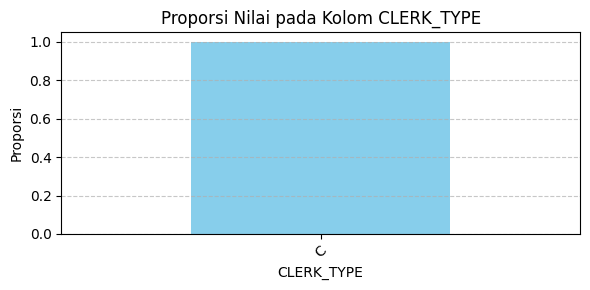

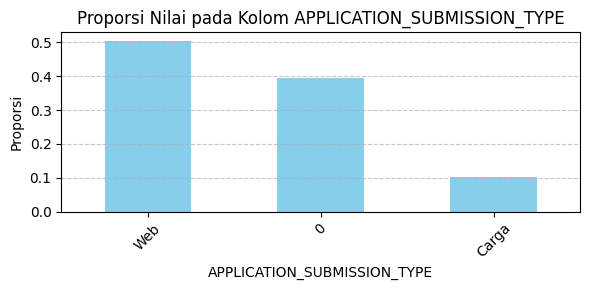

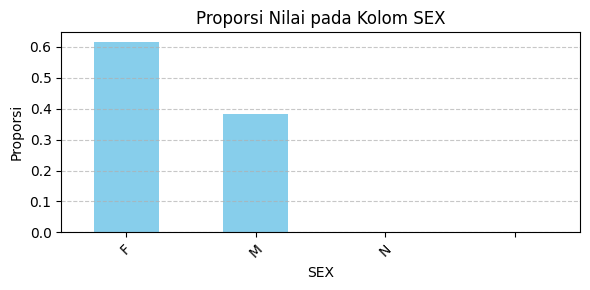

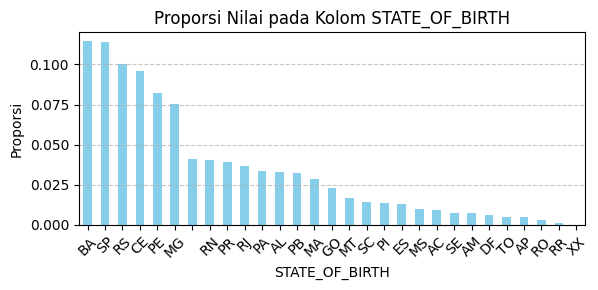

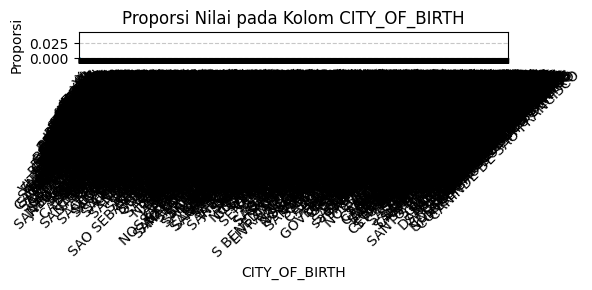

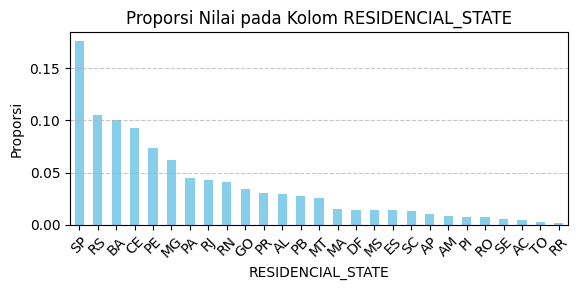

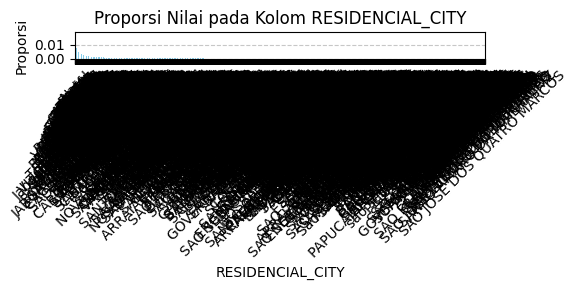

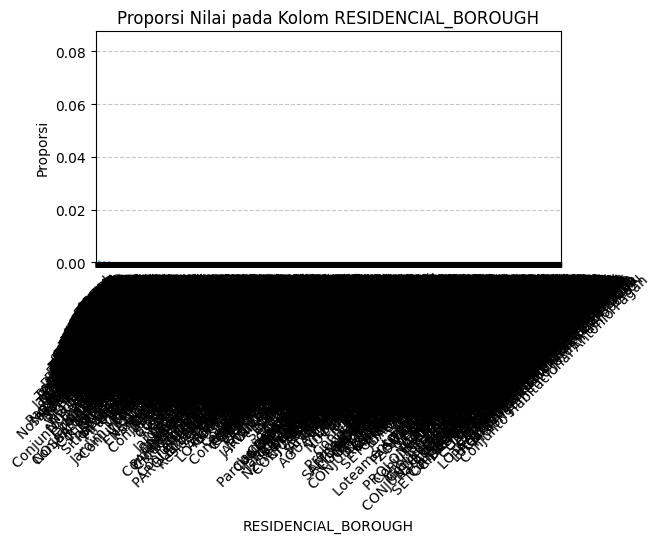

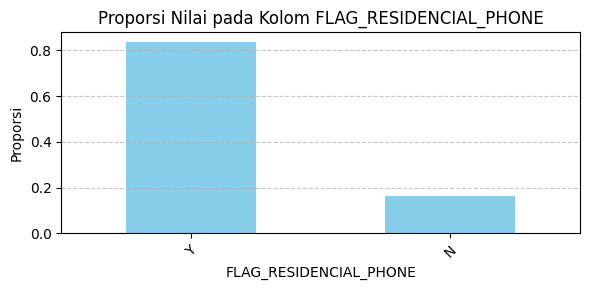

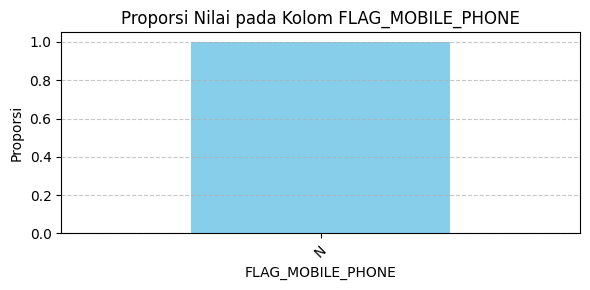

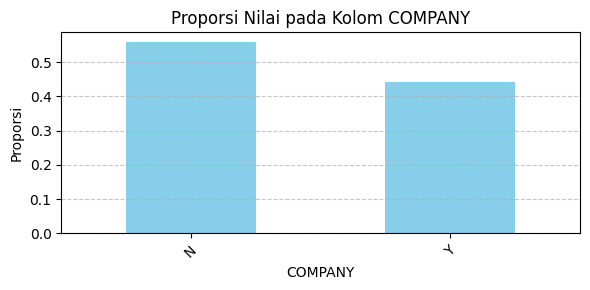

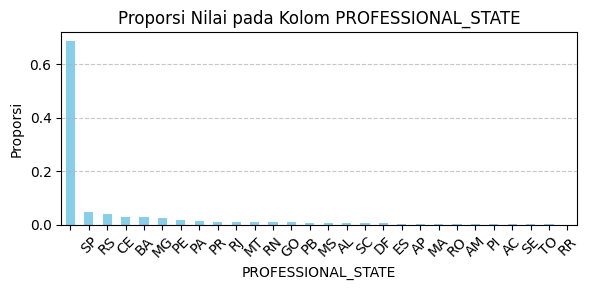

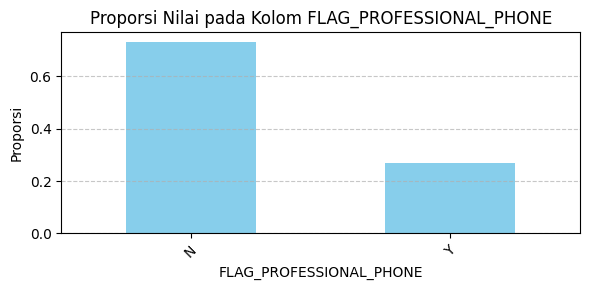

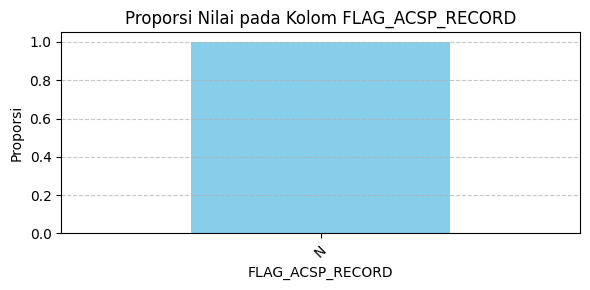

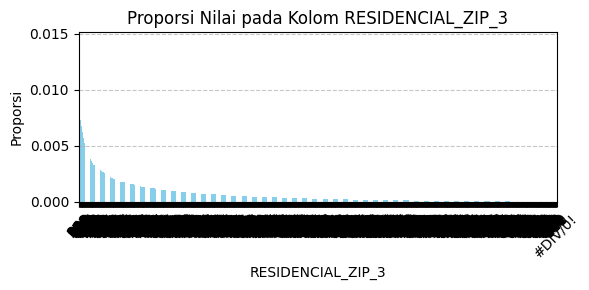

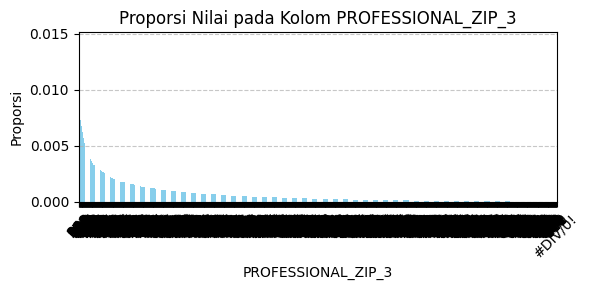

In [ ]:
# Visualisasi bar chart proporsi kategori
for col in categorical2_cols:
    plt.figure(figsize=(6, 3))
    df[col].value_counts(normalize=True).plot(kind='bar', color='skyblue')
    plt.title(f'Proporsi Nilai pada Kolom {col}')
    plt.ylabel('Proporsi')
    plt.xlabel(col)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [ ]:
df['RESIDENCIAL_CITY'] = df['RESIDENCIAL_CITY'].str.strip().str.title()

In [ ]:
df.RESIDENCIAL_CITY.value_counts()

,count
RESIDENCIAL_CITY,
Fortaleza,1671
Sao Paulo,1432
Pelotas,1174
Recife,919
Natal,879
...,...
Taboa Da Serra,1
Porto Alegre Norte,1
Campina Mte Alegre,1


In [ ]:
grouped = df.groupby('RESIDENCIAL_CITY').agg(
    total_pemohon=('TARGET_LABEL_BAD.1', 'count'),
    total_default=('TARGET_LABEL_BAD.1', 'sum')
)
grouped['default_rate'] = grouped['total_default'] / grouped['total_pemohon']


In [ ]:
grouped

,total_pemohon,total_default,default_rate
RESIDENCIAL_CITY,,,
Aaruama,1,0,0.000000
Abadia De Goias,2,0,0.000000
Abaetetuba,24,7,0.291667
Ablumenau,1,1,1.000000
Abre E Lima,1,1,1.000000
...,...,...,...
Xangrila,7,1,0.142857
Xexem,1,1,1.000000
Xexeu,4,0,0.000000


In [ ]:
numerical2_cols

['ID_CLIENT',
 'PAYMENT_DAY',
 'QUANT_ADDITIONAL_CARDS',
 'POSTAL_ADDRESS_TYPE',
 'MARITAL_STATUS',
 'QUANT_DEPENDANTS',
 'NATIONALITY',
 'RESIDENCE_TYPE',
 'MONTHS_IN_RESIDENCE',
 'FLAG_EMAIL',
 'PERSONAL_MONTHLY_INCOME',
 'OTHER_INCOMES',
 'FLAG_VISA',
 'FLAG_MASTERCARD',
 'FLAG_DINERS',
 'FLAG_AMERICAN_EXPRESS',
 'FLAG_OTHER_CARDS',
 'QUANT_BANKING_ACCOUNTS',
 'QUANT_SPECIAL_BANKING_ACCOUNTS',
 'PERSONAL_ASSETS_VALUE',
 'QUANT_CARS',
 'MONTHS_IN_THE_JOB',
 'FLAG_HOME_ADDRESS_DOCUMENT',
 'FLAG_RG',
 'FLAG_CPF',
 'FLAG_INCOME_PROOF',
 'PRODUCT',
 'AGE',
 'TARGET_LABEL_BAD.1']

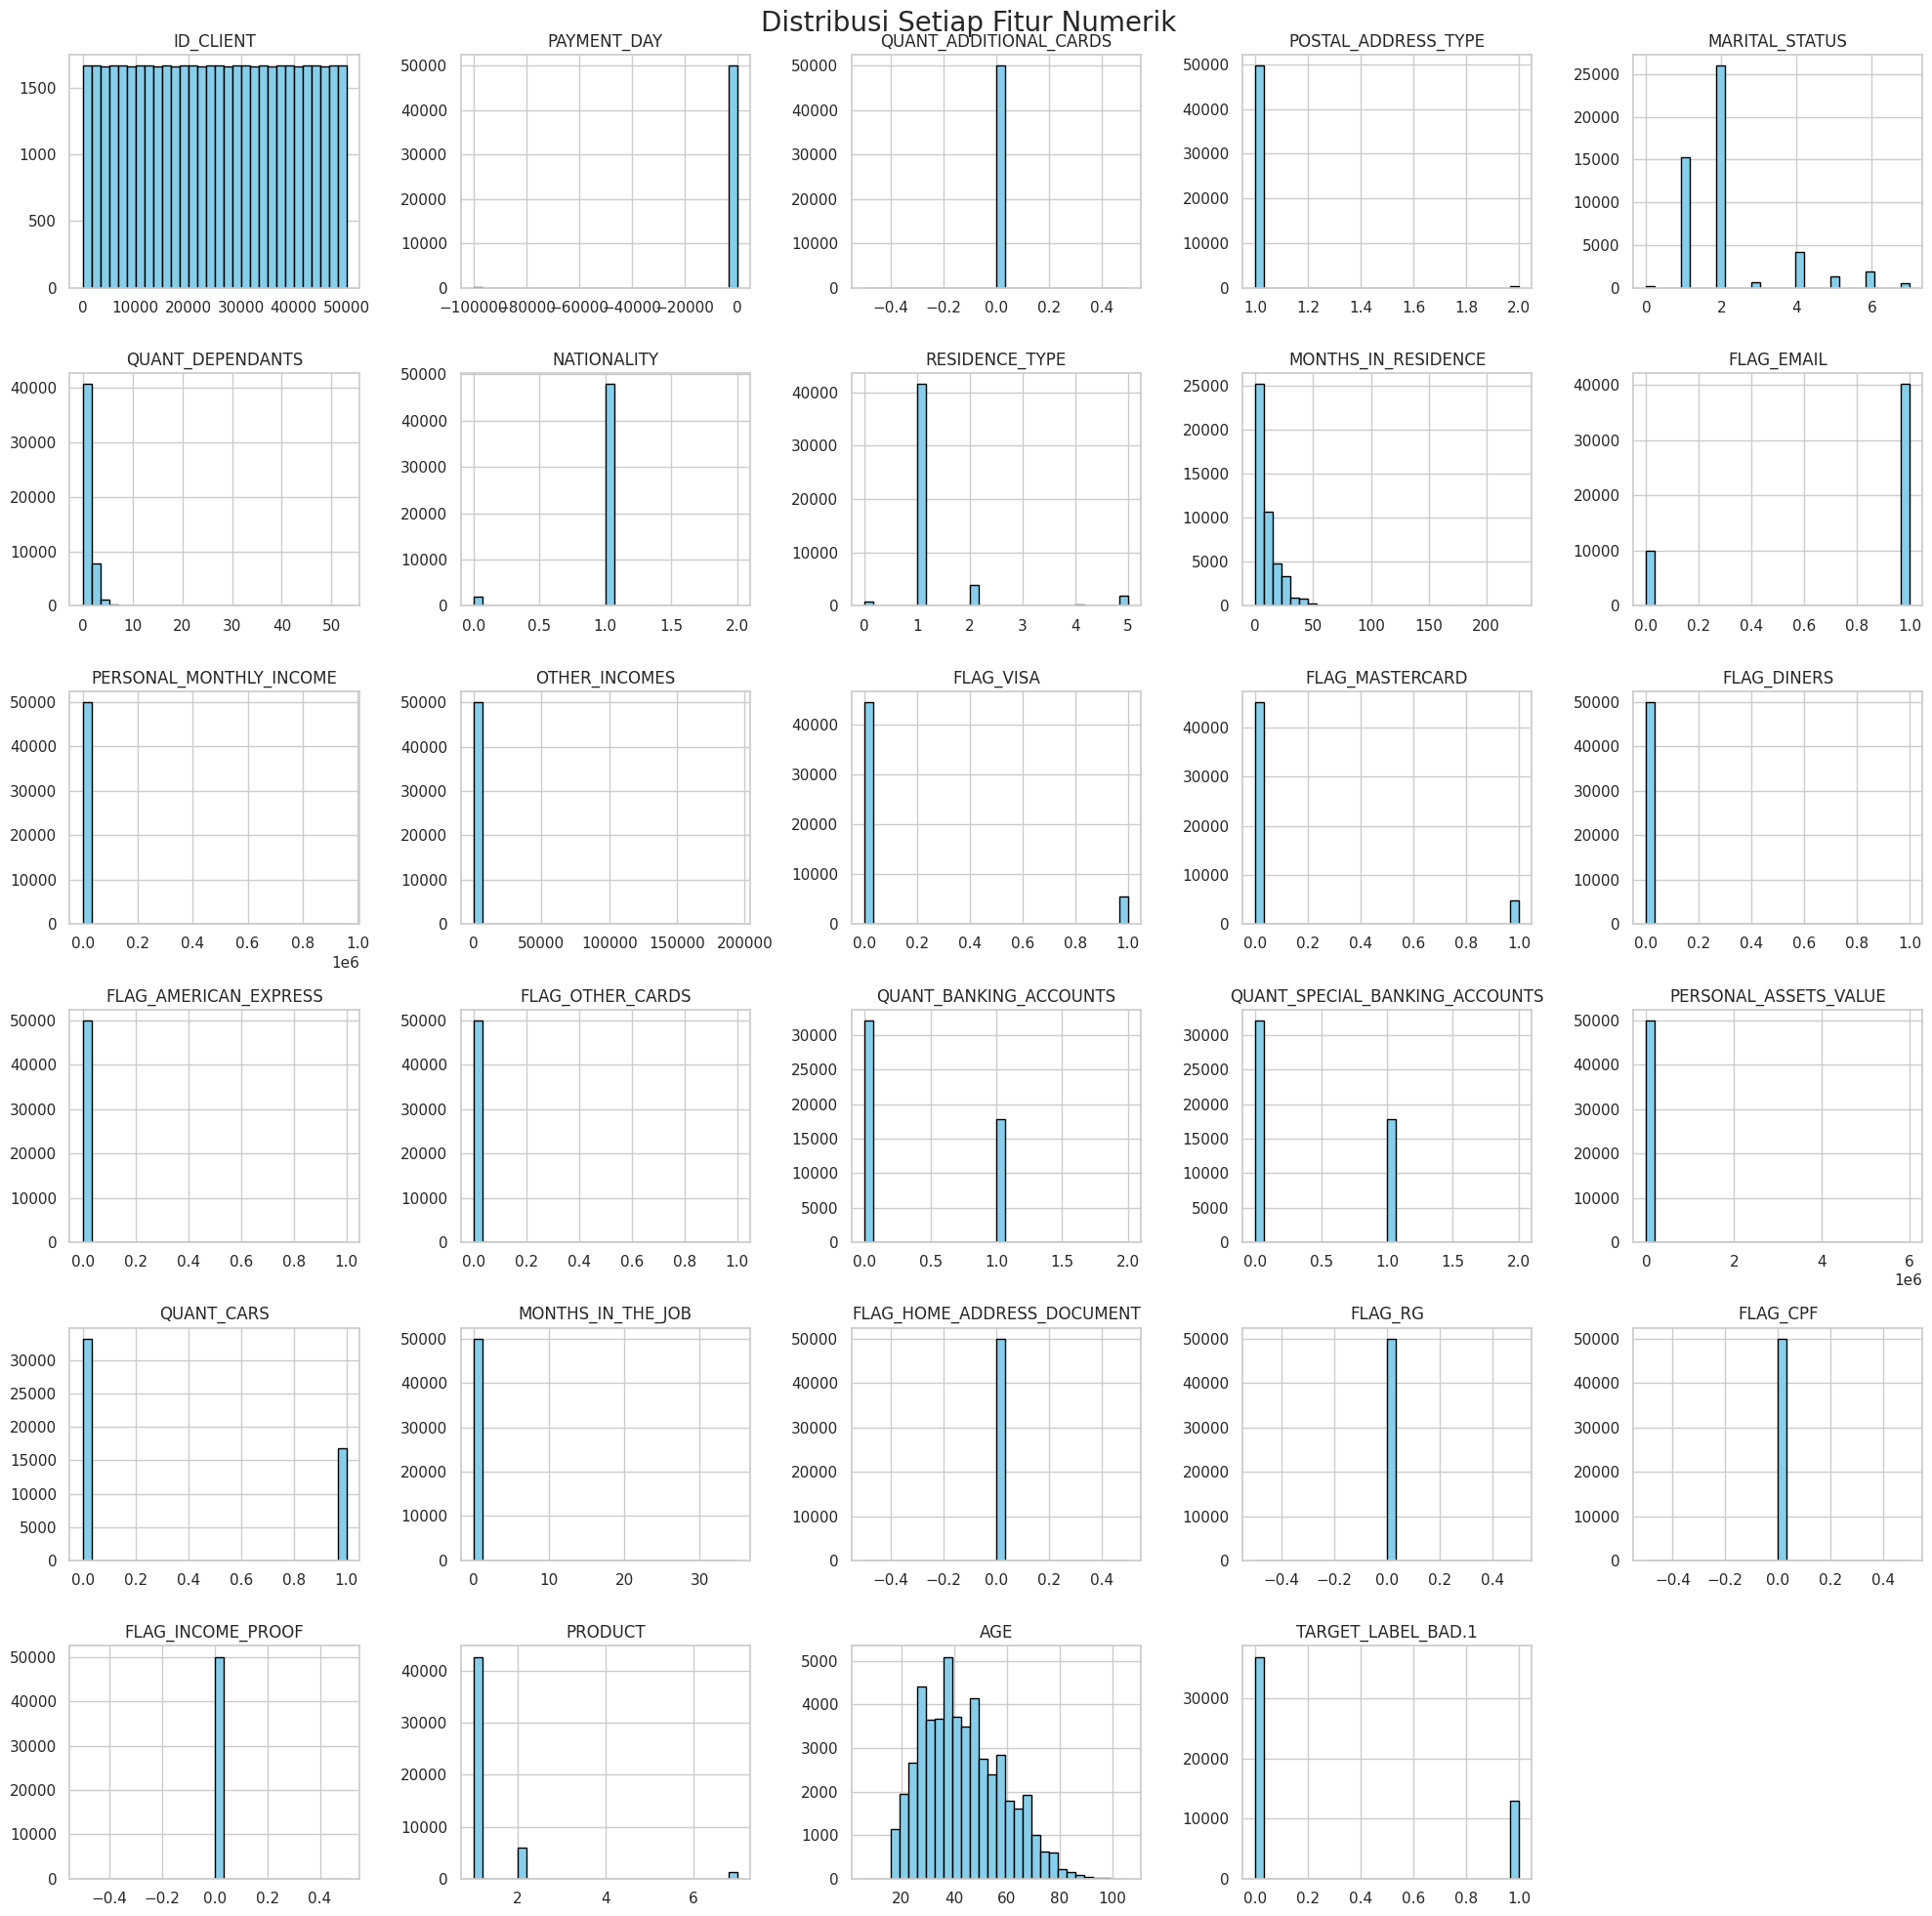

In [ ]:
# Atur style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 5)

# 1. Histogram untuk semua kolom numerik
df[numerical2_cols].hist(bins=30, figsize=(20, 20), color='skyblue', edgecolor='black')
plt.suptitle("Distribusi Setiap Fitur Numerik", fontsize=20)
plt.tight_layout()
plt.show()

In [ ]:
df['TARGET_LABEL_BAD.1'].value_counts()

,count
TARGET_LABEL_BAD.1,
0,36959
1,13041


In [ ]:
df.drop(['SEX'],axis=1,inplace=True)

In [ ]:
df.columns

Index(['ID_CLIENT', 'CLERK_TYPE', 'PAYMENT_DAY', 'APPLICATION_SUBMISSION_TYPE',
       'QUANT_ADDITIONAL_CARDS', 'POSTAL_ADDRESS_TYPE', 'MARITAL_STATUS',
       'QUANT_DEPENDANTS', 'STATE_OF_BIRTH', 'CITY_OF_BIRTH', 'NATIONALITY',
       'RESIDENCIAL_STATE', 'RESIDENCIAL_CITY', 'RESIDENCIAL_BOROUGH',
       'FLAG_RESIDENCIAL_PHONE', 'RESIDENCE_TYPE', 'MONTHS_IN_RESIDENCE',
       'FLAG_MOBILE_PHONE', 'FLAG_EMAIL', 'PERSONAL_MONTHLY_INCOME',
       'OTHER_INCOMES', 'FLAG_VISA', 'FLAG_MASTERCARD', 'FLAG_DINERS',
       'FLAG_AMERICAN_EXPRESS', 'FLAG_OTHER_CARDS', 'QUANT_BANKING_ACCOUNTS',
       'QUANT_SPECIAL_BANKING_ACCOUNTS', 'PERSONAL_ASSETS_VALUE', 'QUANT_CARS',
       'COMPANY', 'PROFESSIONAL_STATE', 'FLAG_PROFESSIONAL_PHONE',
       'MONTHS_IN_THE_JOB', 'FLAG_HOME_ADDRESS_DOCUMENT', 'FLAG_RG',
       'FLAG_CPF', 'FLAG_INCOME_PROOF', 'PRODUCT', 'FLAG_ACSP_RECORD', 'AGE',
       'RESIDENCIAL_ZIP_3', 'PROFESSIONAL_ZIP_3', 'TARGET_LABEL_BAD.1'],
      dtype='object')

In [ ]:
target = df[['ID_CLIENT',"AGE","MARITAL_STATUS","QUANT_DEPENDANTS","FLAG_EMAIL","PERSONAL_MONTHLY_INCOME","OTHER_INCOMES","FLAG_VISA","FLAG_MASTERCARD","FLAG_DINERS","FLAG_AMERICAN_EXPRESS","FLAG_OTHER_CARDS","QUANT_CARS","QUANT_BANKING_ACCOUNTS","QUANT_SPECIAL_BANKING_ACCOUNTS","PERSONAL_ASSETS_VALUE","MONTHS_IN_THE_JOB","FLAG_INCOME_PROOF","FLAG_ACSP_RECORD", "RESIDENCE_TYPE", "MONTHS_IN_RESIDENCE", "COMPANY", "FLAG_PROFESSIONAL_PHONE", "TARGET_LABEL_BAD.1"]]
target.head()

,ID_CLIENT,AGE,MARITAL_STATUS,QUANT_DEPENDANTS,FLAG_EMAIL,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,...,QUANT_SPECIAL_BANKING_ACCOUNTS,PERSONAL_ASSETS_VALUE,MONTHS_IN_THE_JOB,FLAG_INCOME_PROOF,FLAG_ACSP_RECORD,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,COMPANY,FLAG_PROFESSIONAL_PHONE,TARGET_LABEL_BAD.1
1,1,32,6,1,1,900.0,0.0,1,1,0,...,0,0.0,0,0,N,1.0,15.0,N,N,1
2,2,34,2,0,1,750.0,0.0,0,0,0,...,0,0.0,0,0,N,1.0,1.0,Y,N,1
3,3,27,2,0,1,500.0,0.0,0,0,0,...,0,0.0,0,0,N,1.0,NaN,N,N,0
4,4,61,2,0,1,500.0,0.0,0,0,0,...,0,0.0,0,0,N,NaN,NaN,N,N,0
5,5,48,2,0,1,1200.0,0.0,0,0,0,...,0,0.0,0,0,N,1.0,12.0,N,N,1


In [ ]:
target.columns

Index(['ID_CLIENT', 'AGE', 'MARITAL_STATUS', 'QUANT_DEPENDANTS', 'FLAG_EMAIL',
       'PERSONAL_MONTHLY_INCOME', 'OTHER_INCOMES', 'FLAG_VISA',
       'FLAG_MASTERCARD', 'FLAG_DINERS', 'FLAG_AMERICAN_EXPRESS',
       'FLAG_OTHER_CARDS', 'QUANT_CARS', 'QUANT_BANKING_ACCOUNTS',
       'QUANT_SPECIAL_BANKING_ACCOUNTS', 'PERSONAL_ASSETS_VALUE',
       'MONTHS_IN_THE_JOB', 'FLAG_INCOME_PROOF', 'FLAG_ACSP_RECORD',
       'RESIDENCE_TYPE', 'MONTHS_IN_RESIDENCE', 'COMPANY',
       'FLAG_PROFESSIONAL_PHONE', 'TARGET_LABEL_BAD.1'],
      dtype='object')

In [ ]:
target.describe()

,ID_CLIENT,AGE,MARITAL_STATUS,QUANT_DEPENDANTS,FLAG_EMAIL,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,...,FLAG_OTHER_CARDS,QUANT_CARS,QUANT_BANKING_ACCOUNTS,QUANT_SPECIAL_BANKING_ACCOUNTS,PERSONAL_ASSETS_VALUE,MONTHS_IN_THE_JOB,FLAG_INCOME_PROOF,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,TARGET_LABEL_BAD.1
count,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.0,48651.000000,46223.000000,50000.000000
mean,25000.500000,43.24852,2.14840,0.650520,0.802280,886.678437,35.434760,0.111440,0.097460,0.001320,...,0.002040,0.336140,0.357840,0.357840,2.322372e+03,0.009320,0.0,1.252225,9.727149,0.260820
std,14433.901067,14.98905,1.32285,1.193655,0.398284,7846.959327,891.515142,0.314679,0.296586,0.036308,...,0.045121,0.472392,0.479953,0.479953,4.235798e+04,0.383453,0.0,0.867833,10.668841,0.439086
min,1.000000,6.00000,0.00000,0.000000,0.000000,60.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.0,0.000000,0.000000,0.000000
25%,12500.750000,31.00000,1.00000,0.000000,1.000000,360.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.0,1.000000,1.000000,0.000000
50%,25000.500000,41.00000,2.00000,0.000000,1.000000,500.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.0,1.000000,6.000000,0.000000
75%,37500.250000,53.00000,2.00000,1.000000,1.000000,800.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000e+00,0.000000,0.0,1.000000,15.000000,1.000000
max,50000.000000,106.00000,7.00000,53.000000,1.000000,959000.000000,194344.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,2.000000,2.000000,6.000000e+06,35.000000,0.0,5.000000,228.000000,1.000000


In [ ]:
data_info = pd.DataFrame({"Missing Values ":target.isnull().sum(), "Data Types":target.dtypes})
data_info

,Missing Values,Data Types
ID_CLIENT,0,int64
AGE,0,int64
MARITAL_STATUS,0,int64
QUANT_DEPENDANTS,0,int64
FLAG_EMAIL,0,int64
PERSONAL_MONTHLY_INCOME,0,float64
OTHER_INCOMES,0,float64
FLAG_VISA,0,int64
FLAG_MASTERCARD,0,int64
FLAG_DINERS,0,int64


- dataset mempunyai 50000 rows dan 54 columns
- ada missing value di beberapa columns "EDUCATIONAL_LEVEL","RESIDENCIAL_PHONE_AREA_CODE","PROFESSIONAL_CITY","PROFESSIONAL_BOROUGH",
    PROFESSIONAL_AREA_AREA_CODE","PROFESSION_CODE","OCCUPATION_TYPE","MATE_PROFESSION_CODE", "EDUCATIONA_LEVEL_1
- beberapa fitur itu dicurgiakan mempunyai nilai angka yang sama seperti "QUANT_ADDITIONAL_CARDS"
- adanya negative value di payment_day
- FLAG_PROFESSIONAL_PHONE DAN FLAG_MOBILE_PHONE akan di enkoding

In [ ]:
target['RESIDENCE_TYPE'].value_counts()

,count
RESIDENCE_TYPE,
1.0,41572
2.0,3884
5.0,1983
0.0,760
4.0,311
3.0,141


In [ ]:
target['MARITAL_STATUS'].value_counts()

,count
MARITAL_STATUS,
2,25967
1,15286
4,4206
6,1877
5,1296
3,632
7,534
0,202


In [ ]:
## process data

#untuk nge drop baris uang ada nan di target variable
target=target.dropna(subset=['TARGET_LABEL_BAD.1'])
X=target.drop('TARGET_LABEL_BAD.1',axis=1)
y=target['TARGET_LABEL_BAD.1']

In [ ]:
#identifikasi kategorikal dan numerical
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
numerical_cols = [col for col in X.select_dtypes(include=['int64', 'float64']).columns if col not in categorical_cols]

In [ ]:
numerical_cols

['ID_CLIENT',
 'AGE',
 'MARITAL_STATUS',
 'QUANT_DEPENDANTS',
 'FLAG_EMAIL',
 'PERSONAL_MONTHLY_INCOME',
 'OTHER_INCOMES',
 'FLAG_VISA',
 'FLAG_MASTERCARD',
 'FLAG_DINERS',
 'FLAG_AMERICAN_EXPRESS',
 'FLAG_OTHER_CARDS',
 'QUANT_CARS',
 'QUANT_BANKING_ACCOUNTS',
 'QUANT_SPECIAL_BANKING_ACCOUNTS',
 'PERSONAL_ASSETS_VALUE',
 'MONTHS_IN_THE_JOB',
 'FLAG_INCOME_PROOF',
 'RESIDENCE_TYPE',
 'MONTHS_IN_RESIDENCE']

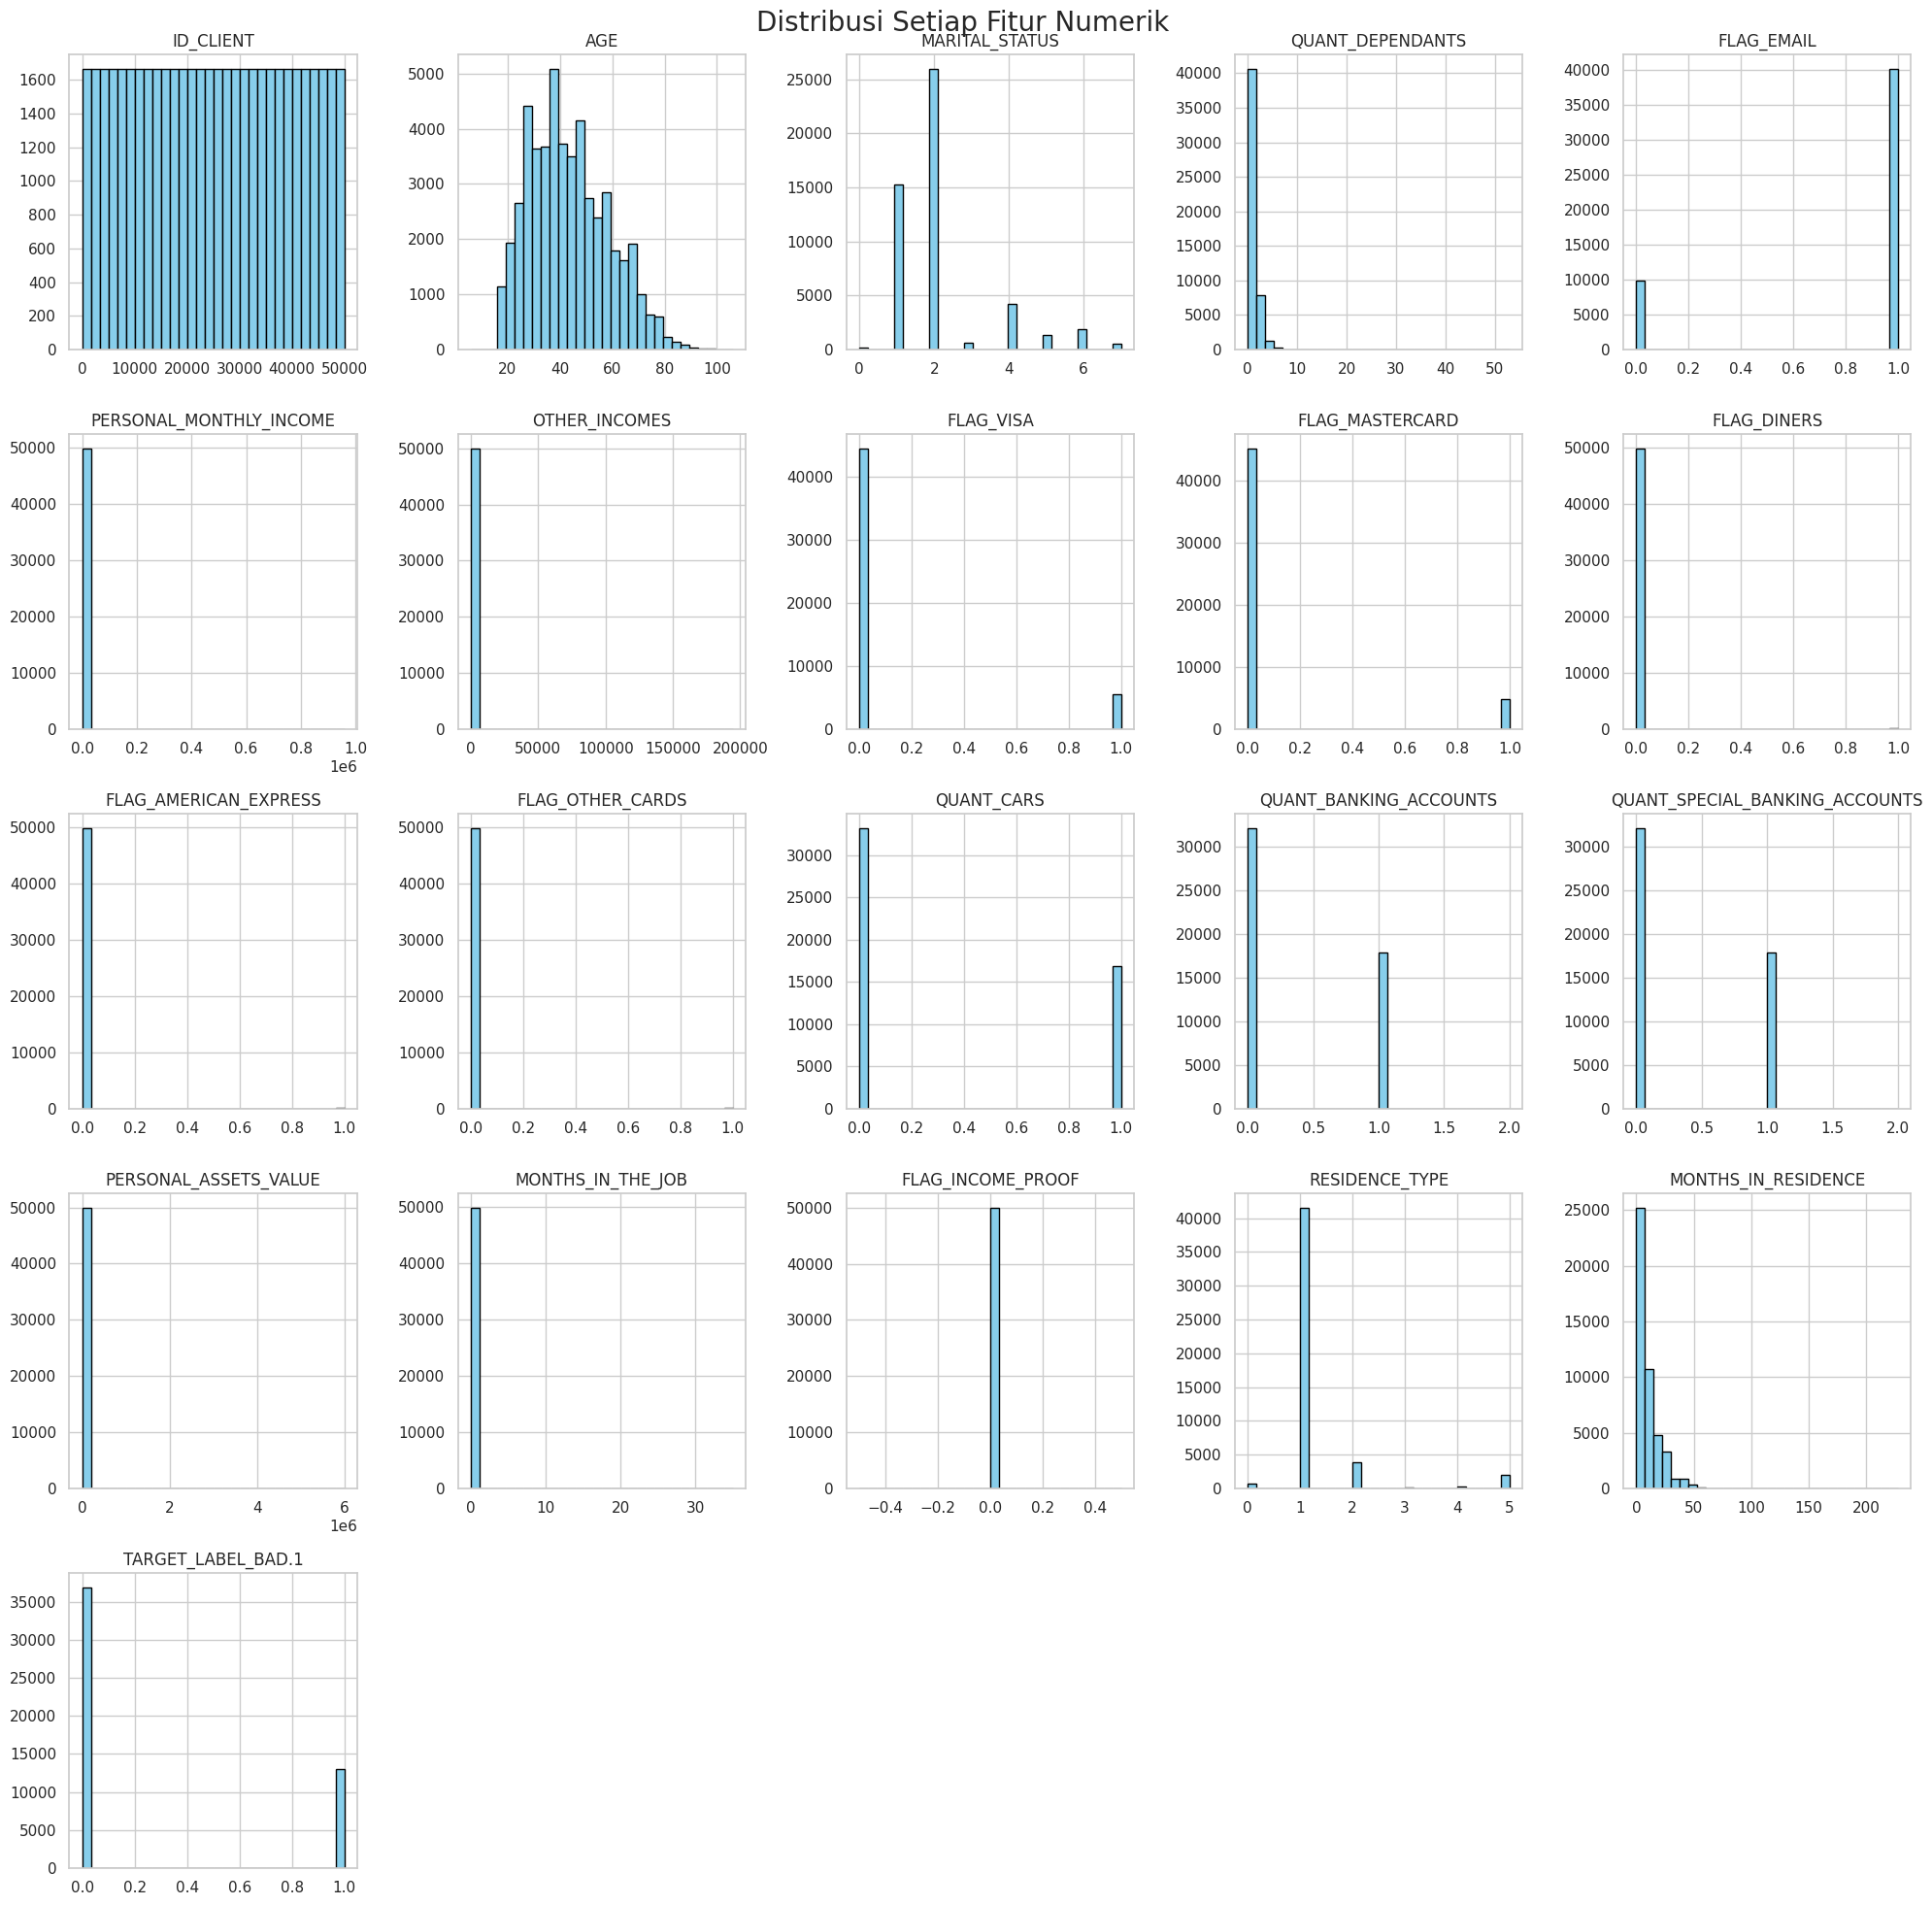

In [ ]:
# Atur style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 5)

# 1. Histogram untuk semua kolom numerik
target[numerical_cols].hist(bins=30, figsize=(20, 20), color='skyblue', edgecolor='black')
plt.suptitle("Distribusi Setiap Fitur Numerik", fontsize=20)
plt.tight_layout()
plt.show()

In [ ]:
categorical_cols

Index(['FLAG_ACSP_RECORD', 'COMPANY', 'FLAG_PROFESSIONAL_PHONE'], dtype='object')

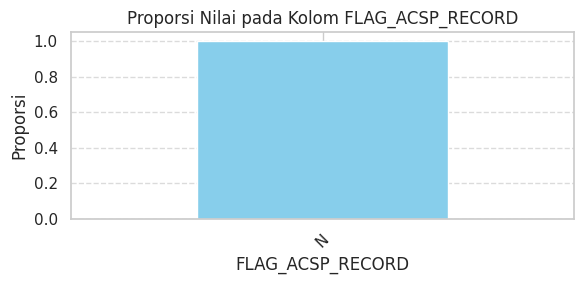

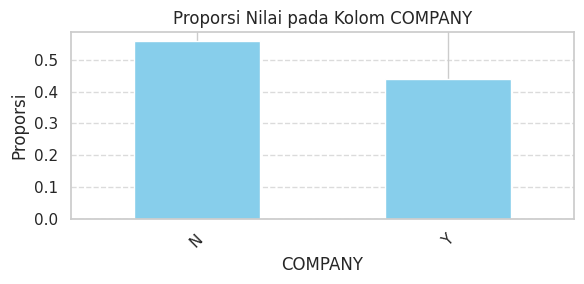

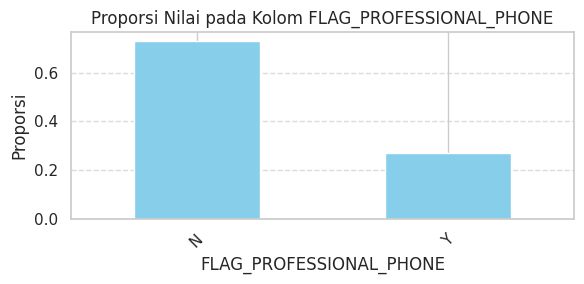

In [ ]:
# Visualisasi bar chart proporsi kategori
for col in categorical_cols:
    plt.figure(figsize=(6, 3))
    df[col].value_counts(normalize=True).plot(kind='bar', color='skyblue')
    plt.title(f'Proporsi Nilai pada Kolom {col}')
    plt.ylabel('Proporsi')
    plt.xlabel(col)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [ ]:
#define columns transformer to apply to the transformation
preprocessor=ColumnTransformer(
    transformers=[
        ('num',KNNImputer(n_neighbors=5),numerical_cols),
        ('cat',Pipeline(steps=[
            ('convert_to_str',FunctionTransformer(lambda x:x.astype(str),validate=False)),
            ('imputer',SimpleImputer(strategy='constant',fill_value='missing')),
            ('onehot',OneHotEncoder(handle_unknown='ignore'))
        ]),categorical_cols)
    ]
)

In [ ]:
#apply transformation
data_preprocessed=preprocessor.fit_transform(X)

In [ ]:
#get features name after one hot encoding
ohe_feature_names=preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_cols)

In [ ]:
#combine feature names from numeric and cat
all_features_names=numerical_cols + ohe_feature_names.tolist()
all_features_names

['ID_CLIENT',
 'AGE',
 'MARITAL_STATUS',
 'QUANT_DEPENDANTS',
 'FLAG_EMAIL',
 'PERSONAL_MONTHLY_INCOME',
 'OTHER_INCOMES',
 'FLAG_VISA',
 'FLAG_MASTERCARD',
 'FLAG_DINERS',
 'FLAG_AMERICAN_EXPRESS',
 'FLAG_OTHER_CARDS',
 'QUANT_CARS',
 'QUANT_BANKING_ACCOUNTS',
 'QUANT_SPECIAL_BANKING_ACCOUNTS',
 'PERSONAL_ASSETS_VALUE',
 'MONTHS_IN_THE_JOB',
 'FLAG_INCOME_PROOF',
 'RESIDENCE_TYPE',
 'MONTHS_IN_RESIDENCE',
 'FLAG_ACSP_RECORD_N',
 'COMPANY_N',
 'COMPANY_Y',
 'FLAG_PROFESSIONAL_PHONE_N',
 'FLAG_PROFESSIONAL_PHONE_Y']

In [ ]:
#create prreprocessed datagrame
df_2=pd.DataFrame(data_preprocessed,columns=all_features_names)

In [ ]:
df_2

,ID_CLIENT,AGE,MARITAL_STATUS,QUANT_DEPENDANTS,FLAG_EMAIL,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,...,PERSONAL_ASSETS_VALUE,MONTHS_IN_THE_JOB,FLAG_INCOME_PROOF,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,FLAG_ACSP_RECORD_N,COMPANY_N,COMPANY_Y,FLAG_PROFESSIONAL_PHONE_N,FLAG_PROFESSIONAL_PHONE_Y
0,1.0,32.0,6.0,1.0,1.0,900.00,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,15.0,1.0,1.0,0.0,1.0,0.0
1,2.0,34.0,2.0,0.0,1.0,750.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0
2,3.0,27.0,2.0,0.0,1.0,500.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,5.8,1.0,1.0,0.0,1.0,0.0
3,4.0,61.0,2.0,0.0,1.0,500.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,6.8,1.0,1.0,0.0,1.0,0.0
4,5.0,48.0,2.0,0.0,1.0,1200.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,12.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49996.0,36.0,1.0,2.0,1.0,1451.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,14.0,1.0,1.0,0.0,1.0,0.0
49996,49997.0,21.0,1.0,0.0,1.0,450.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,15.0,1.0,1.0,0.0,1.0,0.0
49997,49998.0,41.0,2.0,3.0,1.0,1555.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,5.0,1.0,0.0,1.0,0.0,1.0
49998,49999.0,28.0,1.0,1.0,1.0,1443.27,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,15.8,1.0,0.0,1.0,0.0,1.0


<Axes: >

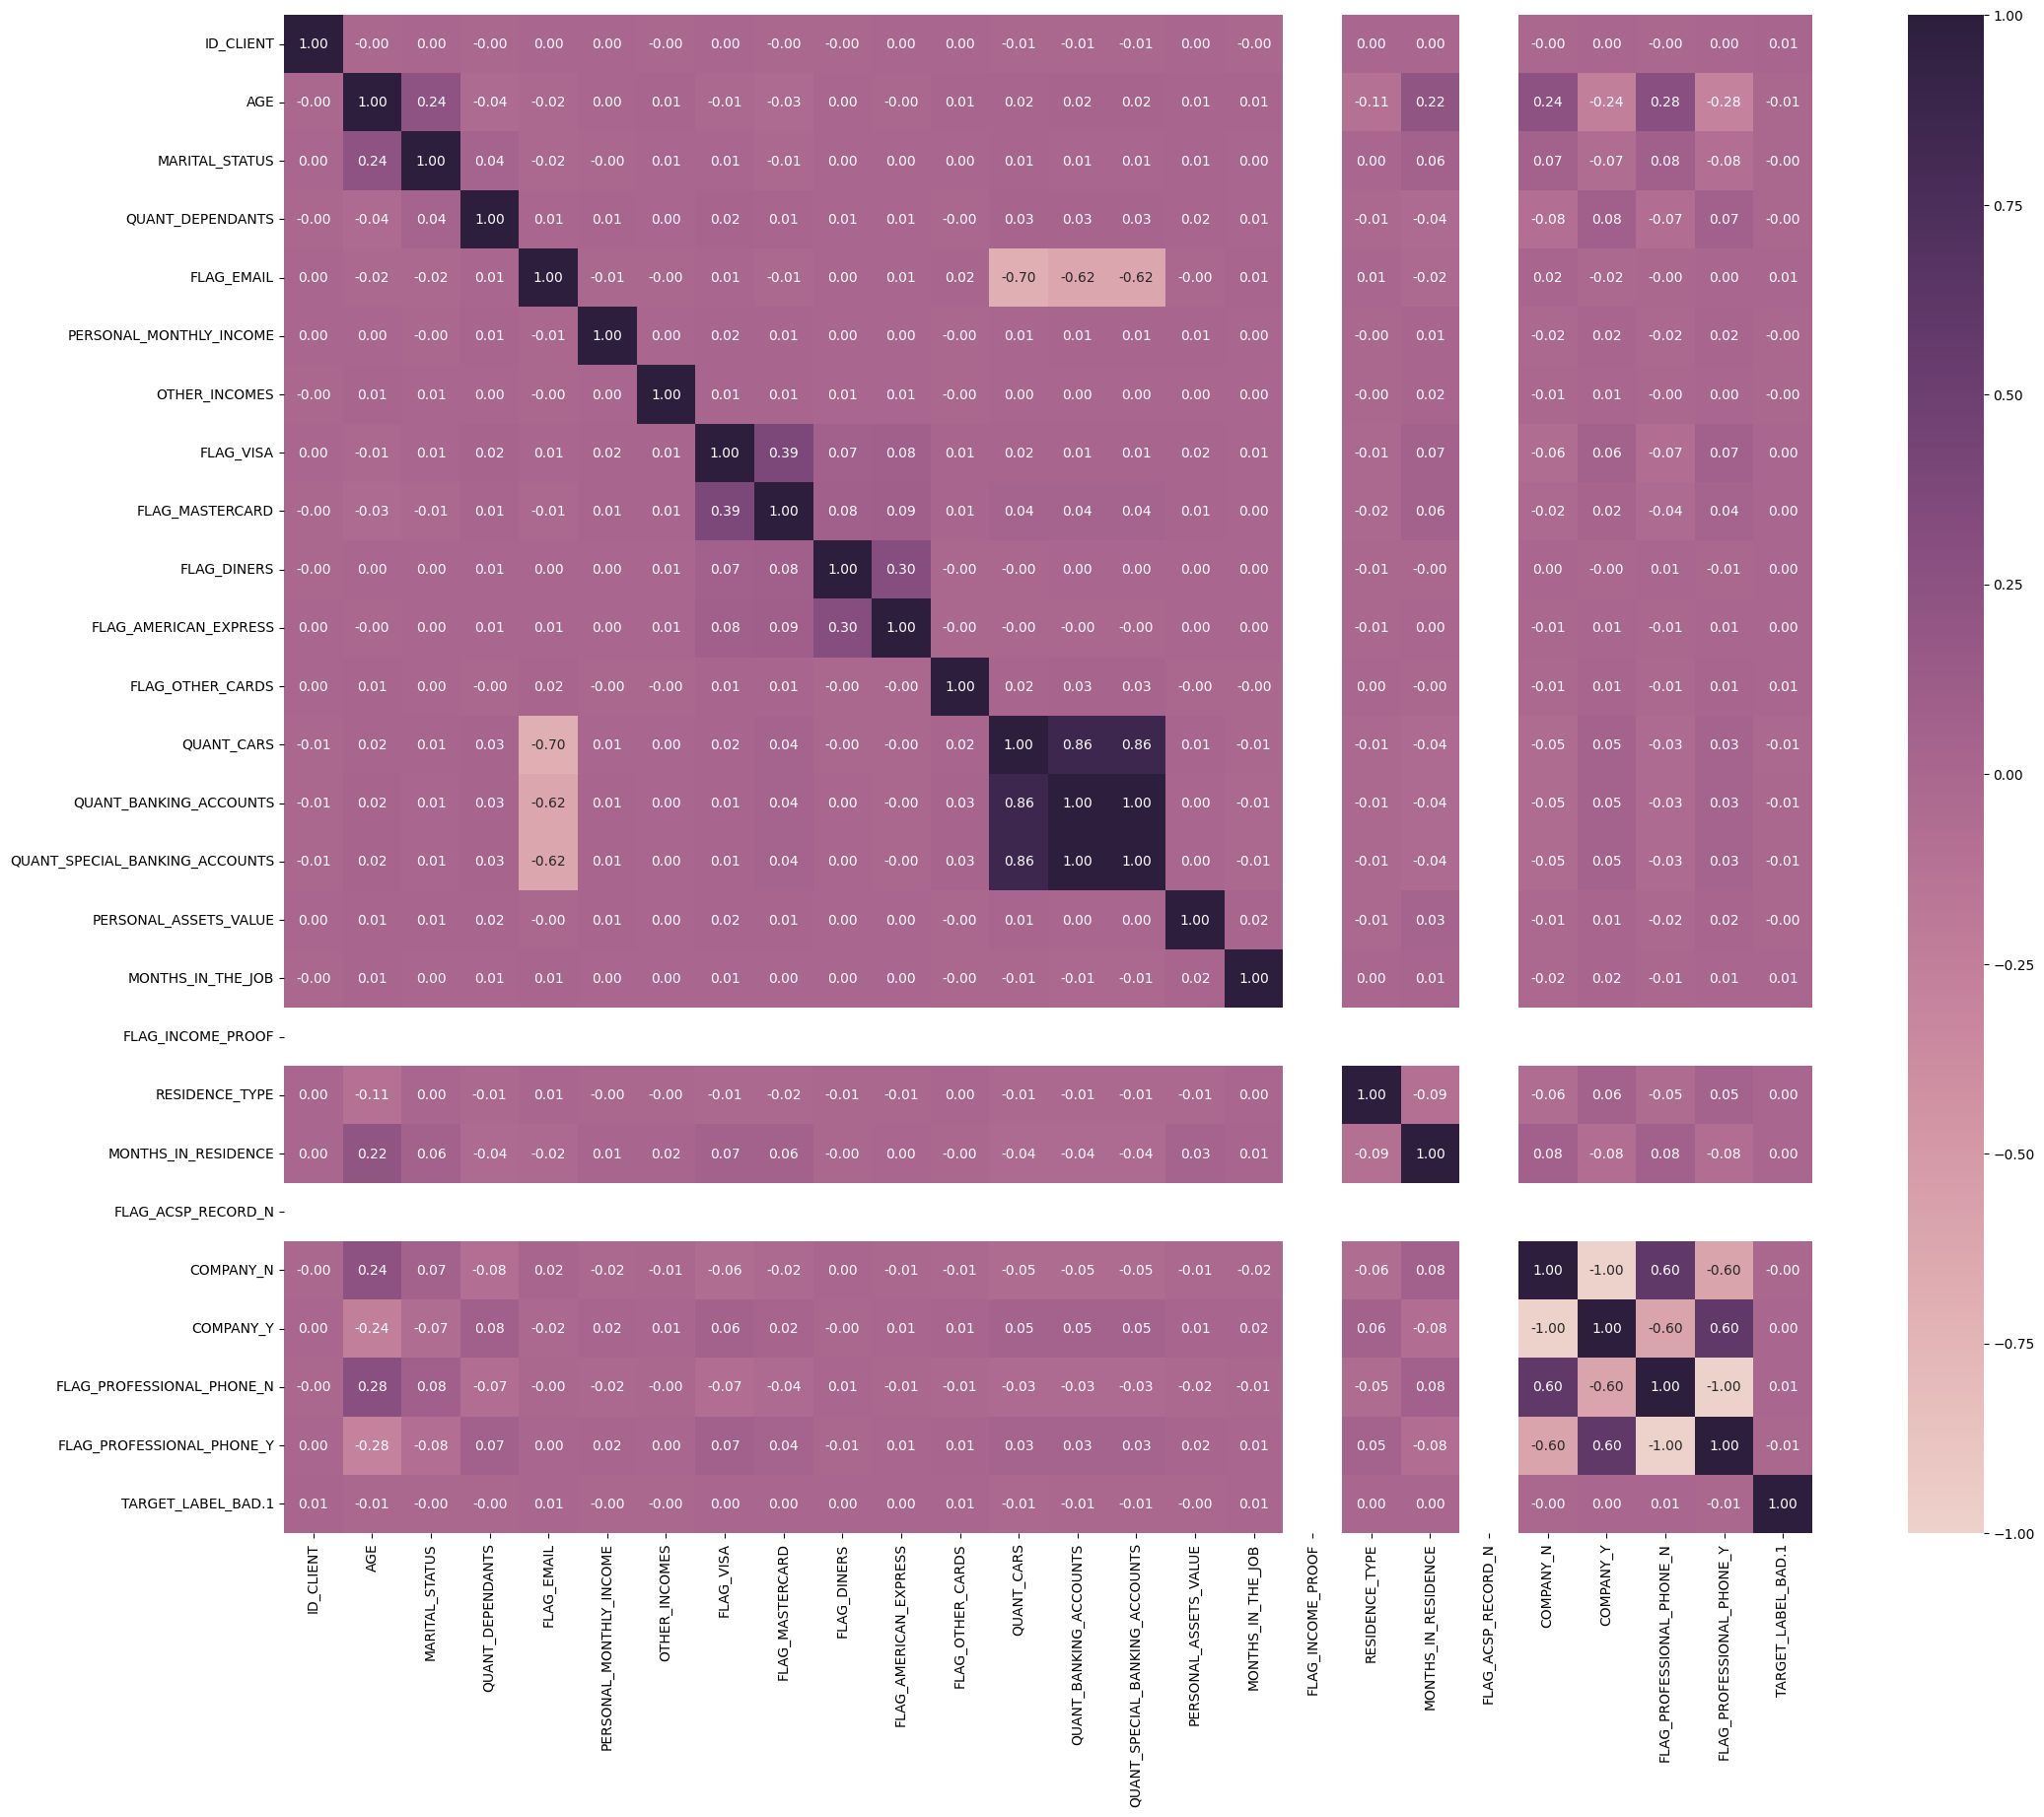

In [ ]:
#add the target variable back
# target columns will stick on the original DF
target_variable='TARGET_LABEL_BAD.1'
df_2[target_variable]=df[target_variable]

#calculation the correlation numeric and target
cor=df_2.corr()[target_variable].sort_values(ascending=False)

plt.figure(figsize=(25,20))
sns.heatmap(df_2.corr(),cmap=sns.cubehelix_palette(as_cmap=True),annot=True,fmt='.2f')

In [ ]:
cor_df=pd.DataFrame(cor).reset_index()
cor_df.rename(columns={'index':'Feature',target_variable:'Correlation with target'})
cor_df

,index,TARGET_LABEL_BAD.1
0,TARGET_LABEL_BAD.1,1.000000
1,ID_CLIENT,0.010530
2,FLAG_OTHER_CARDS,0.007466
3,MONTHS_IN_THE_JOB,0.006588
4,FLAG_PROFESSIONAL_PHONE_N,0.005802
5,FLAG_EMAIL,0.005549
6,RESIDENCE_TYPE,0.003596
7,FLAG_DINERS,0.003495
8,FLAG_VISA,0.002163
9,FLAG_MASTERCARD,0.001883


In [ ]:
## Outliers Checking
df_clean=df_2.dropna(subset=['TARGET_LABEL_BAD.1'])

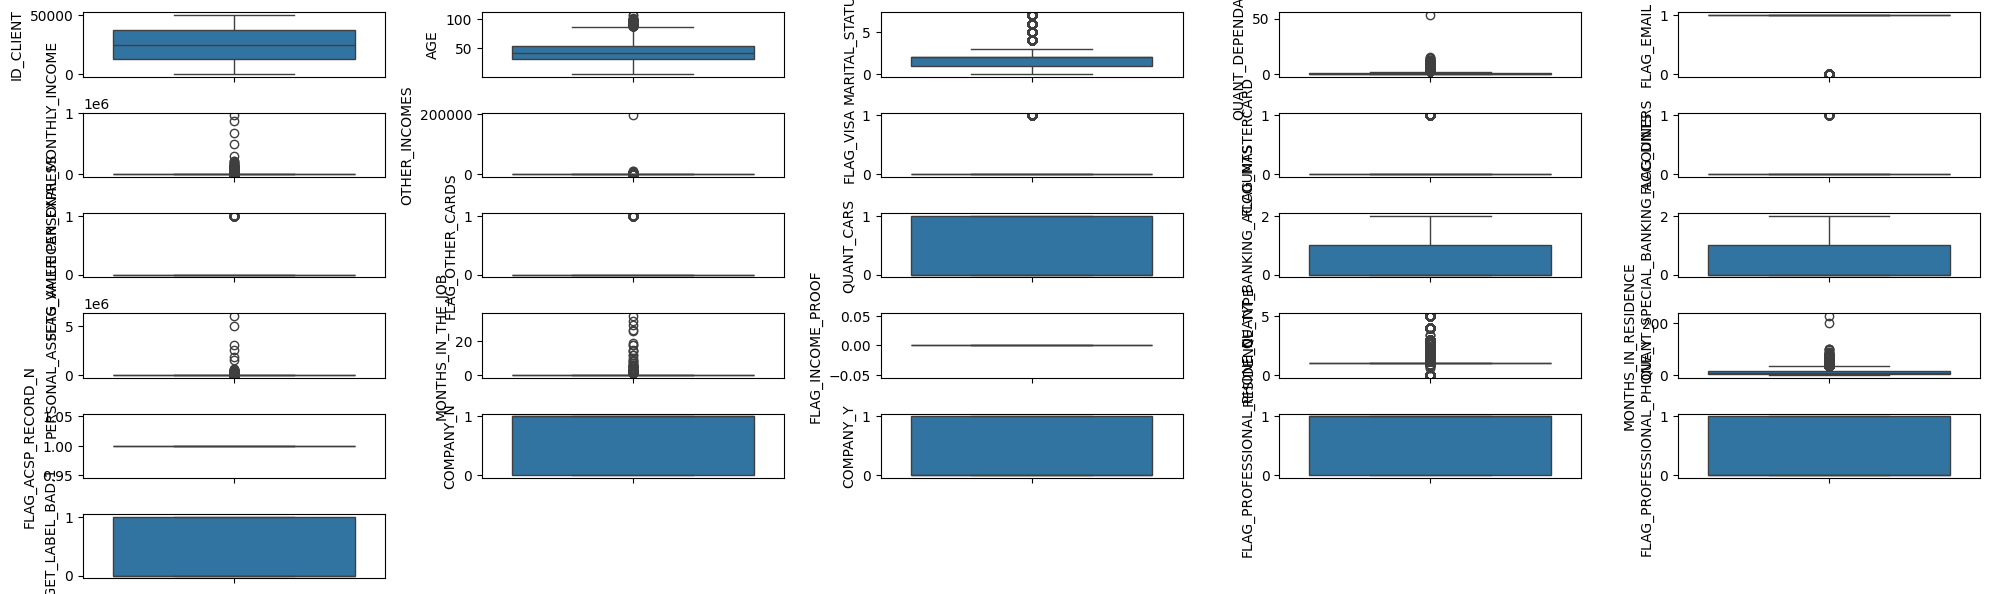

In [ ]:
plt.figure(figsize=(20,10))
x=1

# meng assumsi df_clean adalah pre-define dataframe
for column in df_2.describe().columns:
    plt.subplot(10,5,x)
    sns.boxplot(y=column,data=df_clean)
    x+=1
plt.tight_layout()

# cols = df_clean.describe().columns
# n_cols = len(cols)
# n_rows = math.ceil(n_cols / 5)  # 5 kolom per baris

# plt.figure(figsize=(20, n_rows * 3))  # tinggi disesuaikan
# for i, column in enumerate(cols, start=1):
#     plt.subplot(n_rows, 5, i)
#     sns.boxplot(y=column, data=df_clean)
#     plt.title(column)

# plt.tight_layout()
# plt.show()

In [ ]:
df_clean_outliers=df_clean.copy()

In [ ]:
df_clean_outliers.drop(labels=df_clean_outliers[df_clean_outliers['AGE']==6].index,axis=0,inplace=True)

In [ ]:
df_clean_outliers.drop(labels=df_clean_outliers[df_clean_outliers['AGE']==7].index,axis=0,inplace=True)

In [ ]:
df_clean_outliers.drop(labels=df_clean_outliers[df_clean_outliers['QUANT_DEPENDANTS']==53].index,axis=0,inplace=True)

In [ ]:
df_clean_outliers.drop(['ID_CLIENT', 'FLAG_INCOME_PROOF', 'FLAG_ACSP_RECORD_N'], axis=1, inplace=True)

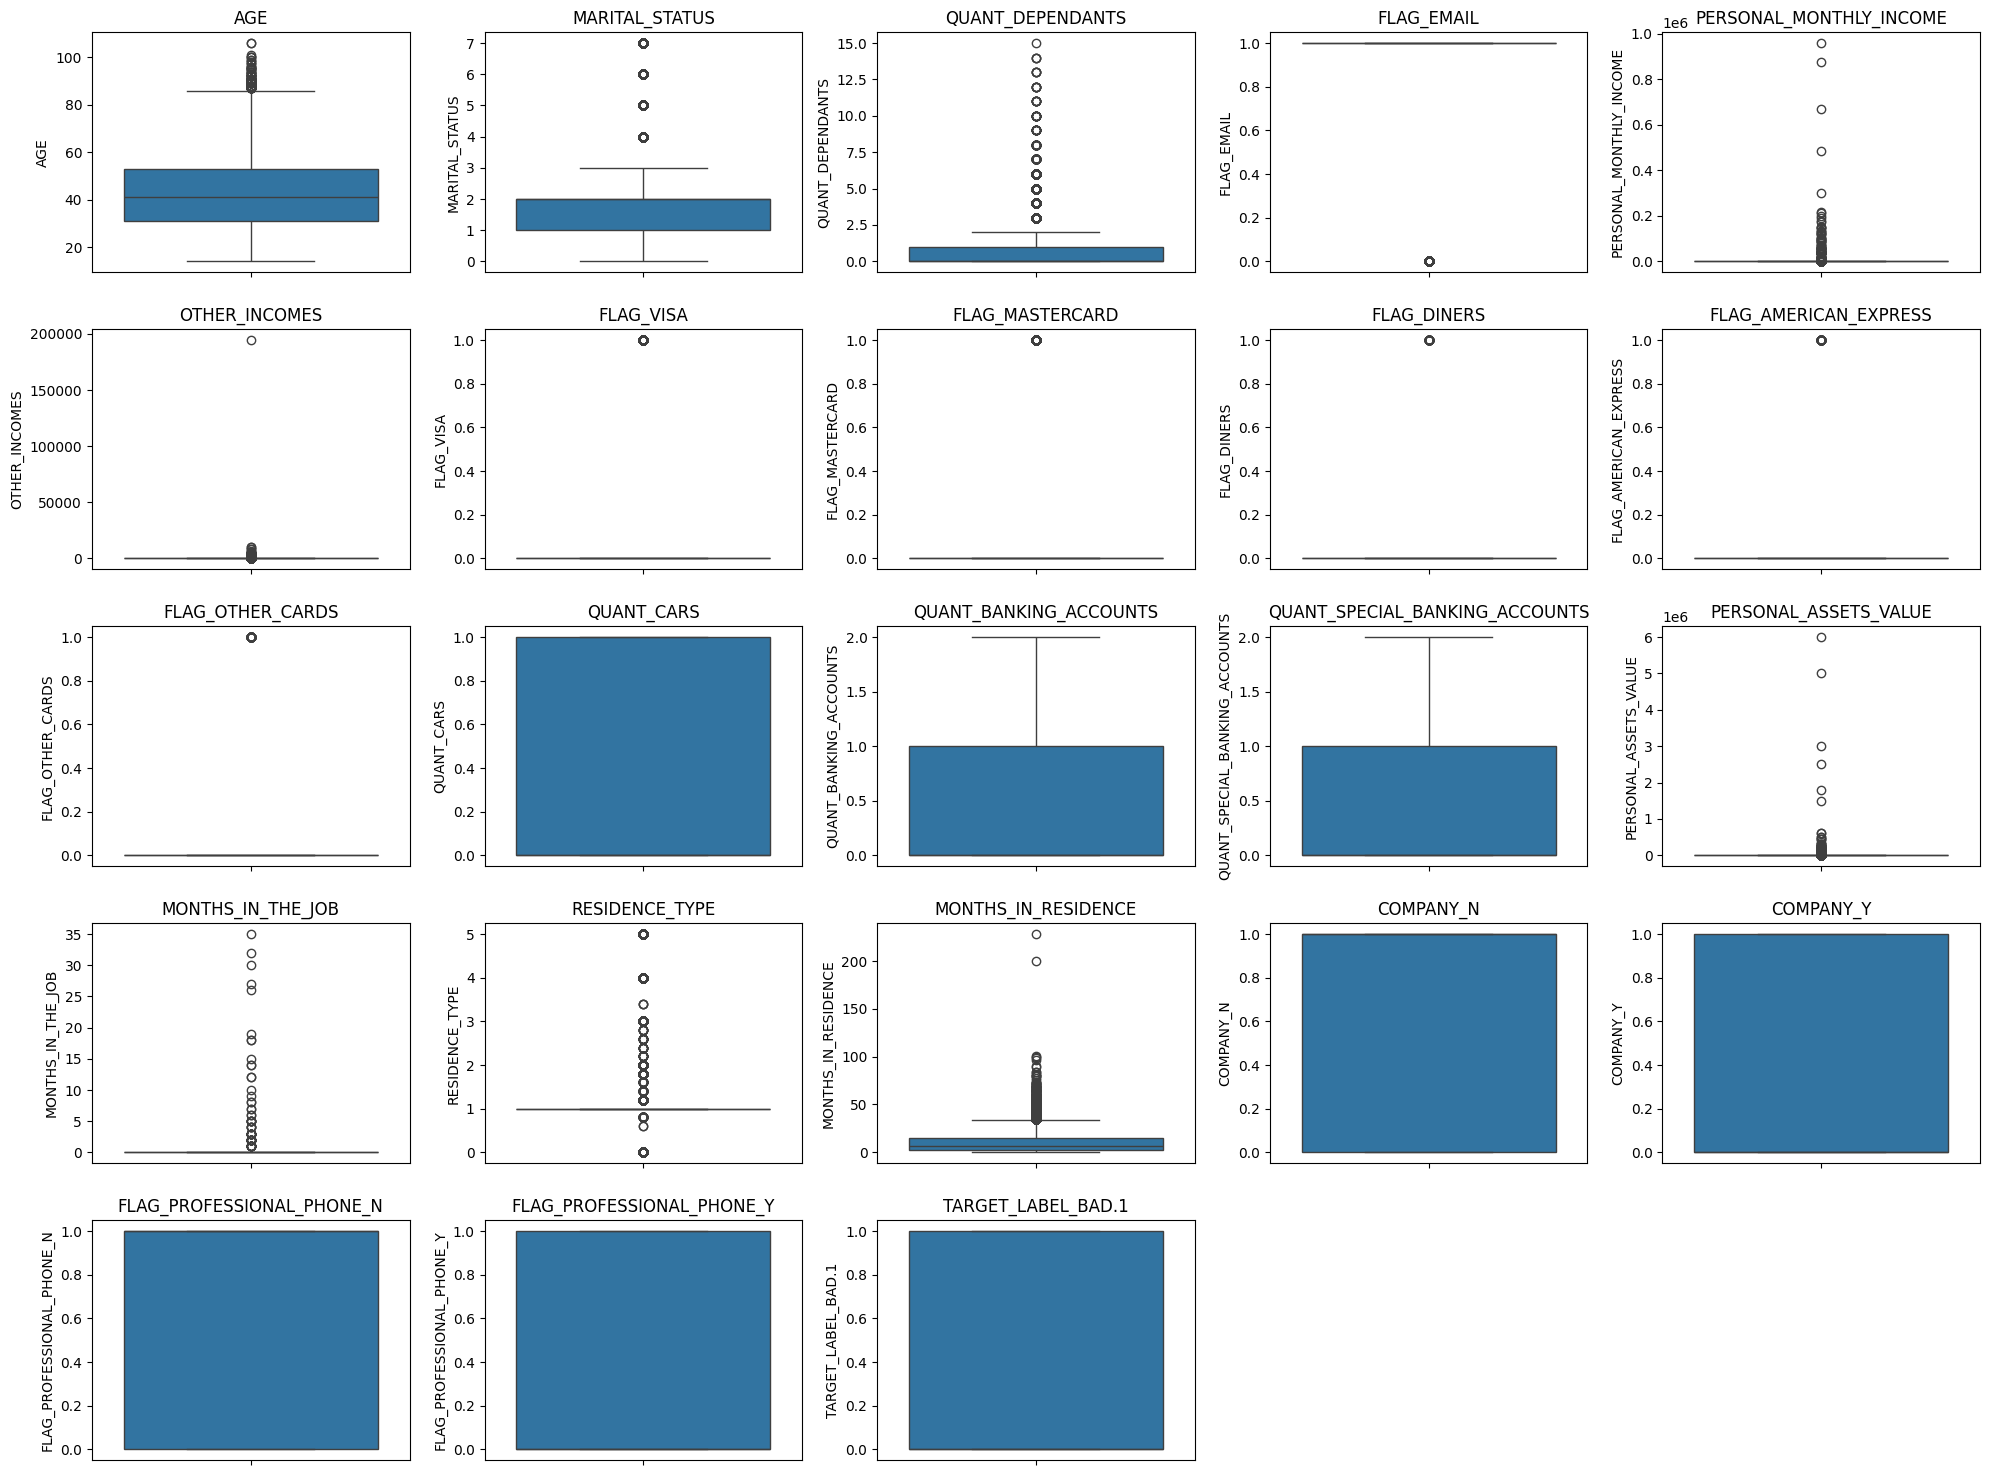

In [ ]:
cols = df_clean_outliers.describe().columns
n_cols = len(cols)
n_rows = math.ceil(n_cols / 5)  # 5 kolom per baris

plt.figure(figsize=(20, n_rows * 3))  # tinggi disesuaikan
for i, column in enumerate(cols, start=1):
    plt.subplot(n_rows, 5, i)
    sns.boxplot(y=column, data=df_clean_outliers)
    plt.title(column)

plt.tight_layout()
plt.show()

In [ ]:
df_clean_outliers.columns

Index(['AGE', 'MARITAL_STATUS', 'QUANT_DEPENDANTS', 'FLAG_EMAIL',
       'PERSONAL_MONTHLY_INCOME', 'OTHER_INCOMES', 'FLAG_VISA',
       'FLAG_MASTERCARD', 'FLAG_DINERS', 'FLAG_AMERICAN_EXPRESS',
       'FLAG_OTHER_CARDS', 'QUANT_CARS', 'QUANT_BANKING_ACCOUNTS',
       'QUANT_SPECIAL_BANKING_ACCOUNTS', 'PERSONAL_ASSETS_VALUE',
       'MONTHS_IN_THE_JOB', 'RESIDENCE_TYPE', 'MONTHS_IN_RESIDENCE',
       'COMPANY_N', 'COMPANY_Y', 'FLAG_PROFESSIONAL_PHONE_N',
       'FLAG_PROFESSIONAL_PHONE_Y', 'TARGET_LABEL_BAD.1'],
      dtype='object')

EDA fitur untuk model RandomForest

In [ ]:
df_clean_outliers['MARITAL_STATUS'] = df_clean_outliers['MARITAL_STATUS'].astype('category')

In [ ]:
df_clean_outliers['QUANT_DEPENDANTS'].value_counts().sort_index()

,count
QUANT_DEPENDANTS,
0.0,33653
1.0,7003
2.0,5363
3.0,2465
4.0,860
5.0,365
6.0,139
7.0,65
8.0,35


In [ ]:
df_clean_outliers['PERSONAL_MONTHLY_INCOME'].describe()
df_clean_outliers['PERSONAL_MONTHLY_INCOME'].quantile([0.95, 0.99, 0.999])

,PERSONAL_MONTHLY_INCOME
0.950,1802.2500
0.990,3678.3735
0.999,43727.8100


In [ ]:
df_clean_outliers['PERSONAL_MONTHLY_INCOME'].value_counts()

,count
PERSONAL_MONTHLY_INCOME,
350.00,6898
500.00,1453
400.00,1402
380.00,1362
600.00,1197
...,...
738.80,1
2289.00,1
1074.08,1


In [ ]:
# # Buat kolom baru hasil log transform
# df_clean_outliers['PERSONAL_MONTHLY_INCOME'] = np.log1p(df_clean_outliers['PERSONAL_MONTHLY_INCOME'])

In [ ]:
df_clean_outliers['OTHER_INCOMES'].value_counts()

,count
OTHER_INCOMES,
0.00,47223
350.00,359
200.00,150
300.00,143
400.00,136
...,...
433.58,1
545.00,1
747.31,1


In [ ]:
df_clean_outliers['OTHER_INCOMES'].min()

0.0

In [ ]:
df_clean_outliers['MONTHS_IN_THE_JOB'].value_counts()

,count
MONTHS_IN_THE_JOB,
0.0,49920
2.0,18
1.0,15
3.0,12
5.0,6
4.0,4
6.0,2
14.0,2
12.0,2


In [ ]:
df_clean_outliers['MONTHS_IN_THE_JOB'].min()

0.0

In [ ]:
df_clean_outliers['MONTHS_IN_RESIDENCE'].value_counts()

,count
MONTHS_IN_RESIDENCE,
1.0,7346
0.0,4694
10.0,3867
5.0,3616
2.0,3237
...,...
99.0,1
78.0,1
26.6,1


In [ ]:
df_clean_outliers['MONTHS_IN_RESIDENCE'].min()

0.0

In [ ]:
df_clean_outliers['PERSONAL_ASSETS_VALUE'].min()

0.0

In [ ]:
df_clean_outliers['MONTHS_IN_RESIDENCE'] = df_clean_outliers['MONTHS_IN_RESIDENCE'].round()
df_clean_outliers['MONTHS_IN_RESIDENCE'] = df_clean_outliers['MONTHS_IN_RESIDENCE'].astype('category')

In [ ]:
df_clean_outliers['RESIDENCE_TYPE'] = df_clean_outliers['RESIDENCE_TYPE'].round().astype('int')
df_clean_outliers['RESIDENCE_TYPE'] = df_clean_outliers['RESIDENCE_TYPE'].astype('category')

In [ ]:
df_clean_outliers.isna().mean() * 100

,0
AGE,0.0
MARITAL_STATUS,0.0
QUANT_DEPENDANTS,0.0
FLAG_EMAIL,0.0
PERSONAL_MONTHLY_INCOME,0.0
OTHER_INCOMES,0.0
FLAG_VISA,0.0
FLAG_MASTERCARD,0.0
FLAG_DINERS,0.0
FLAG_AMERICAN_EXPRESS,0.0


In [ ]:
df_clean_outliers.columns

Index(['AGE', 'MARITAL_STATUS', 'QUANT_DEPENDANTS', 'FLAG_EMAIL',
       'PERSONAL_MONTHLY_INCOME', 'OTHER_INCOMES', 'FLAG_VISA',
       'FLAG_MASTERCARD', 'FLAG_DINERS', 'FLAG_AMERICAN_EXPRESS',
       'FLAG_OTHER_CARDS', 'QUANT_CARS', 'QUANT_BANKING_ACCOUNTS',
       'QUANT_SPECIAL_BANKING_ACCOUNTS', 'PERSONAL_ASSETS_VALUE',
       'MONTHS_IN_THE_JOB', 'RESIDENCE_TYPE', 'MONTHS_IN_RESIDENCE',
       'COMPANY_N', 'COMPANY_Y', 'FLAG_PROFESSIONAL_PHONE_N',
       'FLAG_PROFESSIONAL_PHONE_Y', 'TARGET_LABEL_BAD.1'],
      dtype='object')

Preprocessing Data

In [ ]:
# Define a function for log transformation (np.log1p handles 0 values safely)
def log_transform(X):
    return np.log1p(X)


# Daftar fitur berdasarkan jenisnya
num_features_RF = [
    "AGE", "PERSONAL_MONTHLY_INCOME", "PERSONAL_ASSETS_VALUE",  "QUANT_DEPENDANTS", "OTHER_INCOMES",
    "MONTHS_IN_RESIDENCE", "MONTHS_IN_THE_JOB",  "QUANT_BANKING_ACCOUNTS", "QUANT_SPECIAL_BANKING_ACCOUNTS"
]

cat_features_RF = [
    "MARITAL_STATUS", "RESIDENCE_TYPE"
]

binary_features_RF = [
    "FLAG_EMAIL", "FLAG_VISA", "FLAG_MASTERCARD", "FLAG_DINERS",
    "FLAG_AMERICAN_EXPRESS", "FLAG_OTHER_CARDS", "COMPANY_Y", "COMPANY_N",
    "FLAG_PROFESSIONAL_PHONE_Y", "FLAG_PROFESSIONAL_PHONE_N", "QUANT_CARS"
]


# Numerik
numeric_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("log_transformer", FunctionTransformer(lambda x: np.log1p(x), validate=True)),
])

# Kategorikal
categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

# Binary -> tidak diubah
binary_pipeline = "passthrough"

preprocessor = ColumnTransformer([
    ("num", numeric_pipeline, num_features_RF),
    ("cat", categorical_pipeline, cat_features_RF),
    ("bin", binary_pipeline, binary_features_RF)
])


In [ ]:
## process data

#untuk nge drop baris uang ada nan di target variable
df_clean_outliers=df_clean_outliers.dropna(subset=['TARGET_LABEL_BAD.1'])
X=df_clean_outliers.drop('TARGET_LABEL_BAD.1',axis=1)
y=df_clean_outliers['TARGET_LABEL_BAD.1']

Model RandomForest

In [ ]:
X_train_RF, X_test_RF, y_train_RF, y_test_RF = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
model_RF = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100))
])

In [ ]:
model_RF.fit(X_train_RF, y_train_RF)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('log_transformer',
                                                                   FunctionTransformer(func=<function <lambda> at 0x7b4496075bc0>,
                                                                                       validate=True))]),
                                                  ['AGE',
                                                   'PERSONAL_MONTHLY_INCOME',
                                                   'PERSONAL_ASSETS_VALUE',
                                                   'QUANT_DEPENDANTS',
                                                   'OTHER_INCOMES',
                                                   'MONTHS_IN_RESIDENCE',
                                                   'MONTHS...
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['MARITAL_STATUS',
                                                   'RESIDENCE_TYPE']),
                                                 ('bin', 'passthrough',
                                                  ['FLAG_EMAIL', 'FLAG_VISA',
                                                   'FLAG_MASTERCARD',
                                                   'FLAG_DINERS',
                                                   'FLAG_AMERICAN_EXPRESS',
                                                   'FLAG_OTHER_CARDS',
                                                   'COMPANY_Y', 'COMPANY_N',
                                                   'FLAG_PROFESSIONAL_PHONE_Y',
                                                   'FLAG_PROFESSIONAL_PHONE_N',
                                                   'QUANT_CARS'])])),
                ('classifier', RandomForestClassifier())])

In [ ]:
model_RF.score(X_train_RF, y_train_RF), model_RF.score(X_test_RF, y_test_RF)

(0.9952853101694431, 0.7045803053536902)

In [ ]:
#predict
y_pred_RF=model_RF.predict(X_test_RF)

In [ ]:
#overfitting test
# Prediksi data training
y_pred_train_RF = model_RF.predict(X_train_RF)

# Prediksi data testing
y_pred_test_RF = model_RF.predict(X_test_RF)

# Akurasi training
acc_RF_base_train = accuracy_score(y_train_RF, y_pred_train_RF)

# Akurasi testing
acc_RF_base = accuracy_score(y_test_RF, y_pred_test_RF)

# Cetak hasil
print(f'training accuracy: {acc_RF_base_train}')
print(f'testing accuracy: {acc_RF_base}')

training accuracy: 0.9952853101694431
testing accuracy: 0.7045803053536902


In [ ]:
print(classification_report(y_test_RF, y_pred_test_RF))

              precision    recall  f1-score   support

         0.0       0.74      0.93      0.82     11087
         1.0       0.25      0.06      0.10      3912

    accuracy                           0.70     14999
   macro avg       0.49      0.50      0.46     14999
weighted avg       0.61      0.70      0.64     14999



In [ ]:
# Buat confusion matrix
cm3 = confusion_matrix(y_test_RF, y_pred_test_RF)

# Tampilkan hasilnya
print("Confusion Matrix:")
print(cm3)

Confusion Matrix:
[[10317   770]
 [ 3661   251]]


In [ ]:
print("ROC-AUC Score",roc_auc_score(y_test_RF,y_pred_RF))

ROC-AUC Score 0.49735542307789504


In [ ]:
#over sampler for the target columns
ROS_RF=RandomOverSampler(random_state=42)
X_ROS,y_ROS=ROS_RF.fit_resample(X,y)

In [ ]:
X_train_ROS,X_test_ROS,y_train_ROS,y_test_ROS=train_test_split(X_ROS,y_ROS,test_size=0.3,random_state=42)

In [ ]:
ROS_classifier = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100))
])

In [ ]:
ROS_classifier.fit(X_train_ROS,y_train_ROS)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('log_transformer',
                                                                   FunctionTransformer(func=<function <lambda> at 0x7b4496075bc0>,
                                                                                       validate=True))]),
                                                  ['AGE',
                                                   'PERSONAL_MONTHLY_INCOME',
                                                   'PERSONAL_ASSETS_VALUE',
                                                   'QUANT_DEPENDANTS',
                                                   'OTHER_INCOMES',
                                                   'MONTHS_IN_RESIDENCE',
                                                   'MONTHS...
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['MARITAL_STATUS',
                                                   'RESIDENCE_TYPE']),
                                                 ('bin', 'passthrough',
                                                  ['FLAG_EMAIL', 'FLAG_VISA',
                                                   'FLAG_MASTERCARD',
                                                   'FLAG_DINERS',
                                                   'FLAG_AMERICAN_EXPRESS',
                                                   'FLAG_OTHER_CARDS',
                                                   'COMPANY_Y', 'COMPANY_N',
                                                   'FLAG_PROFESSIONAL_PHONE_Y',
                                                   'FLAG_PROFESSIONAL_PHONE_N',
                                                   'QUANT_CARS'])])),
                ('classifier', RandomForestClassifier())])

In [ ]:
ROS_pred=ROS_classifier.predict(X_test_ROS)

In [ ]:
print(confusion_matrix(y_test_ROS,ROS_pred))

[[8760 2373]
 [1399 9641]]


In [ ]:
print(classification_report(y_test_ROS,ROS_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.79      0.82     11133
         1.0       0.80      0.87      0.84     11040

    accuracy                           0.83     22173
   macro avg       0.83      0.83      0.83     22173
weighted avg       0.83      0.83      0.83     22173



In [ ]:
ROS_classifier.score(X_train_ROS, y_train_ROS), ROS_classifier.score(X_test_ROS, y_test_ROS)

(0.9954191391074086, 0.8298831912686601)

In [ ]:
#OVERFIT AFTER ROS
y_pred_train_RF_ROS=ROS_classifier.predict(X_train_ROS)
acc_rf_ROS_base=accuracy_score(y_test_ROS,ROS_pred)

In [ ]:
acc_rf_ROS_base_train=accuracy_score(y_train_ROS,y_pred_train_RF_ROS)
print(f"training accuracy {acc_rf_ROS_base_train}")
print(f"testing accuracy {acc_rf_ROS_base}")

training accuracy 0.9954191391074086
testing accuracy 0.8298831912686601


In [ ]:
print("ROC-AUC Score",roc_auc_score(y_test_ROS,ROS_pred))

ROC-AUC Score 0.8300644455965227


In [ ]:
# Param grid yang lebih luas
param_grid = {
    'clf__n_estimators': [100, 200, 300],
    'clf__max_depth': [15, 25, 50, None],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 4],
    'clf__max_features': ['sqrt', 'log2']
}

# Pipeline
pipeline = Pipeline(steps=[
    ('clf', RandomForestClassifier(random_state=42))
])

# Search
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_grid,
    n_iter=10,
    cv=cv,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Fit ulang
search.fit(X_train_ROS, y_train_ROS)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('clf',
                                              RandomForestClassifier(random_state=42))]),
                   n_jobs=-1,
                   param_distributions={'clf__max_depth': [15, 25, 50, None],
                                        'clf__max_features': ['sqrt', 'log2'],
                                        'clf__min_samples_leaf': [1, 2, 4],
                                        'clf__min_samples_split': [2, 5, 10],
                                        'clf__n_estimators': [100, 200, 300]},
                   random_state=42, scoring='roc_auc', verbose=1)

In [ ]:
# Evaluasi di test set
best_model = search.best_estimator_

y_pred = best_model.predict(X_test_RF)
y_proba = best_model.predict_proba(X_test_RF)[:, 1]

print(confusion_matrix(y_test_RF, y_pred))
print(classification_report(y_test_RF, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test_RF, y_proba))

# Cek best params
print("Best Parameters:", search.best_params_)
print("Best CV ROC-AUC:", search.best_score_)

[[10356   731]
 [  374  3538]]
              precision    recall  f1-score   support

         0.0       0.97      0.93      0.95     11087
         1.0       0.83      0.90      0.86      3912

    accuracy                           0.93     14999
   macro avg       0.90      0.92      0.91     14999
weighted avg       0.93      0.93      0.93     14999

ROC-AUC Score: 0.9688246039918893
Best Parameters: {'clf__n_estimators': 200, 'clf__min_samples_split': 5, 'clf__min_samples_leaf': 1, 'clf__max_features': 'log2', 'clf__max_depth': 50}
Best CV ROC-AUC: 0.8182282869765838


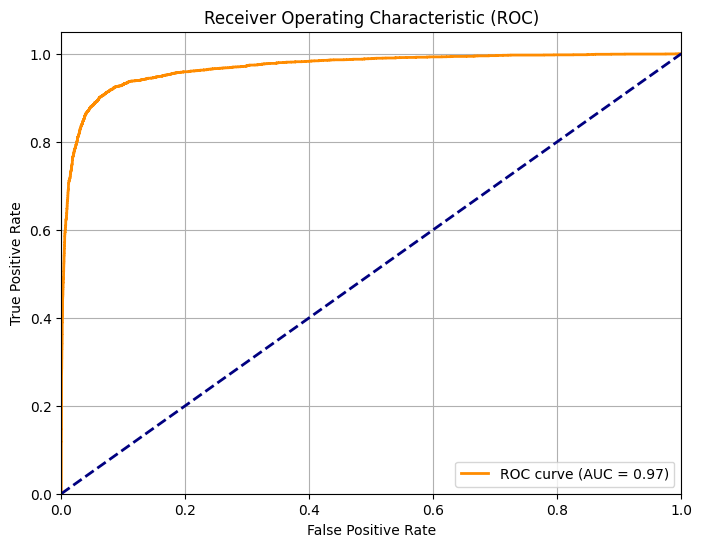

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test_RF, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

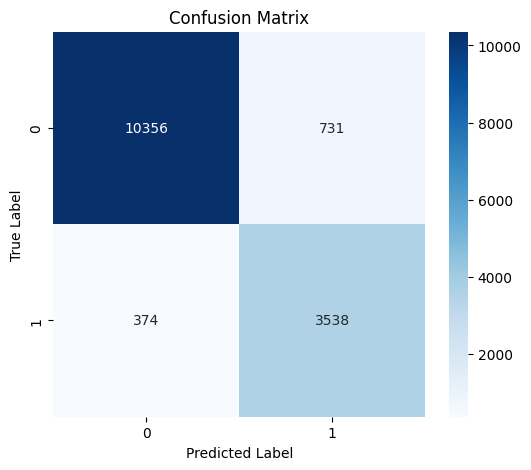

In [ ]:
cm = confusion_matrix(y_test_RF, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

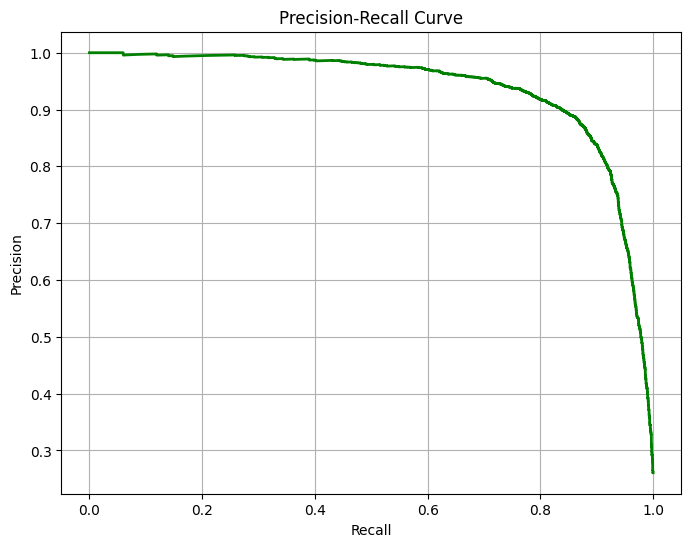

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test_RF, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='green', lw=2)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.grid(True)
plt.show()

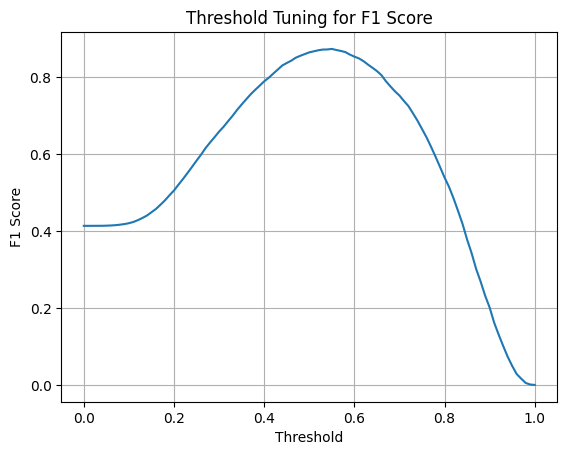

Best threshold: 0.55


In [ ]:
thresholds = np.arange(0.0, 1.01, 0.01)
f1_scores = []

for t in thresholds:
    y_pred_thresh = (y_proba >= t).astype(int)
    score = f1_score(y_test_RF, y_pred_thresh)
    f1_scores.append(score)


plt.plot(thresholds, f1_scores)
plt.xlabel("Threshold")
plt.ylabel("F1 Score")
plt.title("Threshold Tuning for F1 Score")
plt.grid(True)
plt.show()

# Threshold terbaik
best_threshold = thresholds[np.argmax(f1_scores)]
print("Best threshold:", best_threshold)

In [ ]:
roc_auc_test = roc_auc_score(y_test_RF, y_proba)

# Hitung di training set
y_proba_train = best_model.predict_proba(X_train_RF)[:, 1]
roc_auc_train = roc_auc_score(y_train_RF, y_proba_train)

print(f"Train ROC-AUC: {roc_auc_train}")
print(f"Test ROC-AUC: {roc_auc_test}")  # yang kamu hitung sebelumnya

# Jika selisih < 0.05 → tidak overfit

Train ROC-AUC: 0.9673340331119459
Test ROC-AUC: 0.9688246039918893


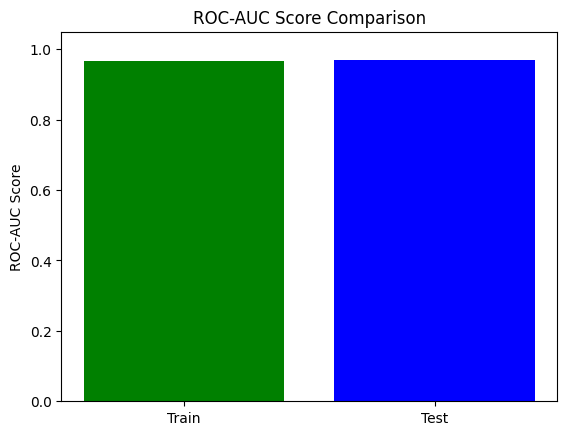

In [ ]:
plt.bar(['Train', 'Test'], [roc_auc_train, roc_auc_test], color=['green', 'blue'])
plt.title("ROC-AUC Score Comparison")
plt.ylim(0.0, 1.05)
plt.ylabel("ROC-AUC Score")
plt.show()

In [ ]:


# Asumsi best_model Anda adalah hasil dari search.best_estimator_
# dan X_test_RF, y_test_RF adalah data pengujian Anda.
# Serta X_train_ROS adalah data pelatihan yang sudah di-oversampling dan preprocessed.
# Ini penting untuk shap.Explainer karena mereka butuh contoh data untuk estimasi.

# 1. Ekstrak model Random Forest dari pipeline
# Karena best_model adalah Pipeline, classifier-nya ada di langkah 'clf'
rf_model = best_model.named_steps['clf']

# 2. Preprocessing data yang sesuai untuk SHAP Explainer
# Shap Explainer membutuhkan data yang telah di-preprocess dengan cara yang sama seperti model dilatih.
# Kita perlu menerapkan preprocessor dari pipeline ke X_test_RF.
preprocessor = best_model.named_steps['preprocessor']
X_test_preprocessed = preprocessor.transform(X_test_RF)

# Dapatkan nama fitur setelah preprocessing
# Ini adalah bagian yang sedikit tricky karena ColumnTransformer mengubah nama kolom.
# Jika Anda tahu urutan kolom asli Anda (num, cat, bin), Anda bisa menyusunnya.
# Contoh sederhana (mungkin perlu disesuaikan dengan struktur data Anda):

# Misalkan Anda memiliki daftar kolom numerik, kategorikal, dan biner asli
# numeric_features = ['umur', 'pendapatan', ...]
# categorical_features = ['jenis_kelamin', 'kota', ...]
# binary_features = ['status_pernikahan', ...]

# Mengambil nama fitur setelah OneHotEncoder
# Anda perlu akses OneHotEncoder dari ColumnTransformer
# Ini adalah contoh dan mungkin perlu disesuaikan dengan nama spesifik Anda
try:
    ohe_features = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
    feature_names = numeric_features + list(ohe_features) + binary_features
except AttributeError:
    # Fallback jika get_feature_names_out tidak tersedia atau structure berbeda
    print("Tidak dapat secara otomatis mendapatkan nama fitur dari OneHotEncoder. "
          "SHAP plot mungkin akan menunjukkan nama kolom default (feature_X).")
    feature_names = [f"feature_{i}" for i in range(X_test_preprocessed.shape[1])]


# 3. Buat SHAP Explainer
# Untuk model berbasis tree seperti Random Forest, TreeExplainer adalah yang paling efisien.
explainer = shap.TreeExplainer(rf_model)

# 4. Hitung SHAP values untuk data pengujian
# Jika X_test_preprocessed adalah numpy array, ubah ke DataFrame untuk visualisasi SHAP yang lebih baik
X_test_preprocessed_df = pd.DataFrame(X_test_preprocessed, columns=feature_names)

shap_values = explainer.shap_values(X_test_preprocessed_df)

# SHAP values untuk klasifikasi biner akan mengembalikan list dari 2 array:
# shap_values[0] untuk class 0
# shap_values[1] untuk class 1
# Kita biasanya tertarik pada SHAP values untuk kelas positif (kelas 1)
shap_values_class1 = shap_values[1]

# Visualisasi SHAP

print("Menampilkan SHAP Summary Plot...")
# Summary plot (bar) menunjukkan rata-rata magnitude SHAP value untuk setiap fitur
shap.summary_plot(shap_values_class1, X_test_preprocessed_df, plot_type="bar", show=False)
plt.title('SHAP Feature Importance (Class 1)')
plt.tight_layout()
plt.show()
#

print("\nMenampilkan SHAP Summary Plot (dot/beeswarm)...")
# Summary plot (beeswarm) menunjukkan distribusi SHAP value untuk setiap fitur
# Warna menunjukkan nilai fitur (merah tinggi, biru rendah)
shap.summary_plot(shap_values_class1, X_test_preprocessed_df, show=False)
plt.title('SHAP Feature Importance Distribution (Class 1)')
plt.tight_layout()
plt.show()
#

print("\nMenampilkan SHAP Dependence Plot untuk fitur paling penting (contoh)...")
# Dependence plot menunjukkan bagaimana nilai fitur tertentu mempengaruhi output model
# Pilih fitur yang ingin Anda plot (misalnya, fitur dengan SHAP value tertinggi)
# Anda bisa mendapatkan fitur paling penting dari summary_plot.data (indeks 0)
# Atau secara manual memilih fitur
# Misalnya, asumsikan fitur_terpenting adalah 'umur'
# shap.dependence_plot("umur", shap_values_class1, X_test_preprocessed_df, show=False)
# plt.show()
#

# Contoh: dependence plot untuk 3 fitur teratas
# Ambil indeks fitur teratas dari shap_values_class1.mean(0)
top_features_indices = np.argsort(np.abs(shap_values_class1).mean(0))[::-1][:3]
top_feature_names = [feature_names[i] for i in top_features_indices]

for feature_name in top_feature_names:
    print(f"Generating dependence plot for: {feature_name}")
    shap.dependence_plot(feature_name, shap_values_class1, X_test_preprocessed_df, show=False)
    plt.title(f'SHAP Dependence Plot for {feature_name} (Class 1)')
    plt.tight_layout()
    plt.show()
    #


print("\nMenampilkan Force Plot untuk satu instansi (contoh)...")
# Force plot menunjukkan bagaimana setiap fitur mendorong output model untuk satu prediksi.
# Pilih indeks instansi yang ingin Anda jelajahi (misalnya, baris pertama dari test set)
instance_idx = 0
shap.initjs() # Inisialisasi JavaScript untuk visualisasi interaktif
shap.force_plot(explainer.expected_value[1], shap_values_class1[instance_idx,:], X_test_preprocessed_df.iloc[instance_idx,:])
#

KeyError: 'preprocessor'

### EDA fitur untuk Logistic Regression

In [ ]:
df_clean_lr=df_clean.copy()

In [ ]:
df_clean_lr.drop(labels=df_clean_lr[df_clean_lr['AGE']==6].index,axis=0,inplace=True)

In [ ]:
df_clean_lr.drop(labels=df_clean_lr[df_clean_lr['AGE']==7].index,axis=0,inplace=True)

In [ ]:
df_clean_lr.drop(labels=df_clean_lr[df_clean_lr['QUANT_DEPENDANTS']==53].index,axis=0,inplace=True)

In [ ]:
df_clean_lr.drop(['ID_CLIENT', 'FLAG_INCOME_PROOF', 'FLAG_ACSP_RECORD_N'], axis=1, inplace=True)

In [ ]:
df_clean_lr.drop(['COMPANY_N', 'FLAG_PROFESSIONAL_PHONE_N'], axis=1, inplace=True)

In [ ]:
df_clean_lr.drop(['QUANT_SPECIAL_BANKING_ACCOUNTS'], axis=1, inplace=True)

In [ ]:
df_clean_lr.drop(['FLAG_OTHER_CARDS'], axis=1, inplace=True)

In [ ]:
df_clean_lr.columns

Index(['AGE', 'MARITAL_STATUS', 'QUANT_DEPENDANTS', 'FLAG_EMAIL',
       'PERSONAL_MONTHLY_INCOME', 'OTHER_INCOMES', 'FLAG_VISA',
       'FLAG_MASTERCARD', 'FLAG_DINERS', 'FLAG_AMERICAN_EXPRESS', 'QUANT_CARS',
       'QUANT_BANKING_ACCOUNTS', 'PERSONAL_ASSETS_VALUE', 'MONTHS_IN_THE_JOB',
       'RESIDENCE_TYPE', 'MONTHS_IN_RESIDENCE', 'COMPANY_Y',
       'FLAG_PROFESSIONAL_PHONE_Y', 'TARGET_LABEL_BAD.1'],
      dtype='object')

In [ ]:
## process data

#untuk nge drop baris uang ada nan di target variable
df_clean_lr=df_clean_lr.dropna(subset=['TARGET_LABEL_BAD.1'])
X=df_clean_lr.drop('TARGET_LABEL_BAD.1',axis=1)
y=df_clean_lr['TARGET_LABEL_BAD.1']

In [ ]:
categorical_cols_lr = X.select_dtypes(include=['object', 'category']).columns
numerical_cols_lr = [col for col in X.select_dtypes(include=['int64', 'float64']).columns if col not in categorical_cols_lr]

In [ ]:
numerical_cols_lr

['AGE',
 'MARITAL_STATUS',
 'QUANT_DEPENDANTS',
 'FLAG_EMAIL',
 'PERSONAL_MONTHLY_INCOME',
 'OTHER_INCOMES',
 'FLAG_VISA',
 'FLAG_MASTERCARD',
 'FLAG_DINERS',
 'FLAG_AMERICAN_EXPRESS',
 'QUANT_CARS',
 'QUANT_BANKING_ACCOUNTS',
 'PERSONAL_ASSETS_VALUE',
 'MONTHS_IN_THE_JOB',
 'RESIDENCE_TYPE',
 'MONTHS_IN_RESIDENCE',
 'COMPANY_Y',
 'FLAG_PROFESSIONAL_PHONE_Y']

In [ ]:
categorical_cols_lr

Index([], dtype='object')

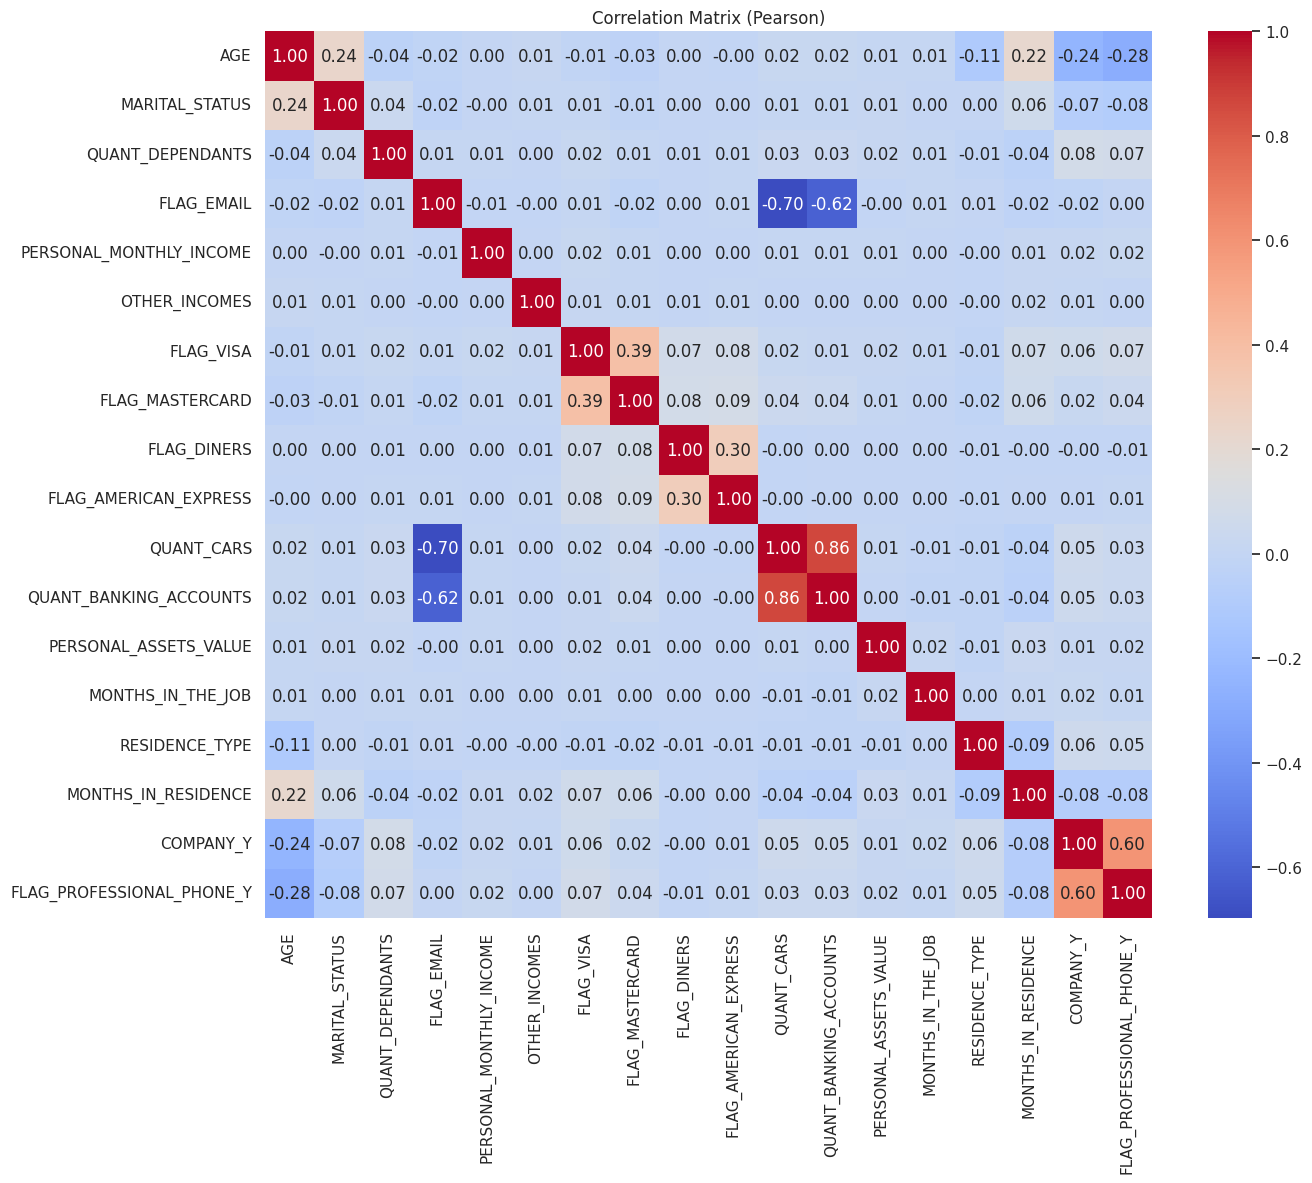

In [ ]:
correlation_matrix = df_clean_lr[numerical_cols_lr].corr(method='pearson')

plt.figure(figsize=(14,12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix (Pearson)")
plt.tight_layout()
plt.show()

In [ ]:
# Misal df_num adalah DataFrame berisi semua fitur numerik
# Pastikan tidak ada NaN dan semua fitur sudah dalam bentuk angka
X = add_constant(df_clean_lr[numerical_cols_lr])

# Hitung VIF
vif = pd.DataFrame()
vif["feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)

                      feature        VIF
0                       const  29.766465
1                         AGE   1.214493
2              MARITAL_STATUS   1.064506
3            QUANT_DEPENDANTS   1.013674
4                  FLAG_EMAIL   1.967225
5     PERSONAL_MONTHLY_INCOME   1.001309
6               OTHER_INCOMES   1.000721
7                   FLAG_VISA   1.189730
8             FLAG_MASTERCARD   1.188813
9                 FLAG_DINERS   1.106437
10      FLAG_AMERICAN_EXPRESS   1.107284
11                 QUANT_CARS   4.685971
12     QUANT_BANKING_ACCOUNTS   3.878454
13      PERSONAL_ASSETS_VALUE   1.002750
14          MONTHS_IN_THE_JOB   1.001562
15             RESIDENCE_TYPE   1.019223
16        MONTHS_IN_RESIDENCE   1.075139
17                  COMPANY_Y   1.582220
18  FLAG_PROFESSIONAL_PHONE_Y   1.612383


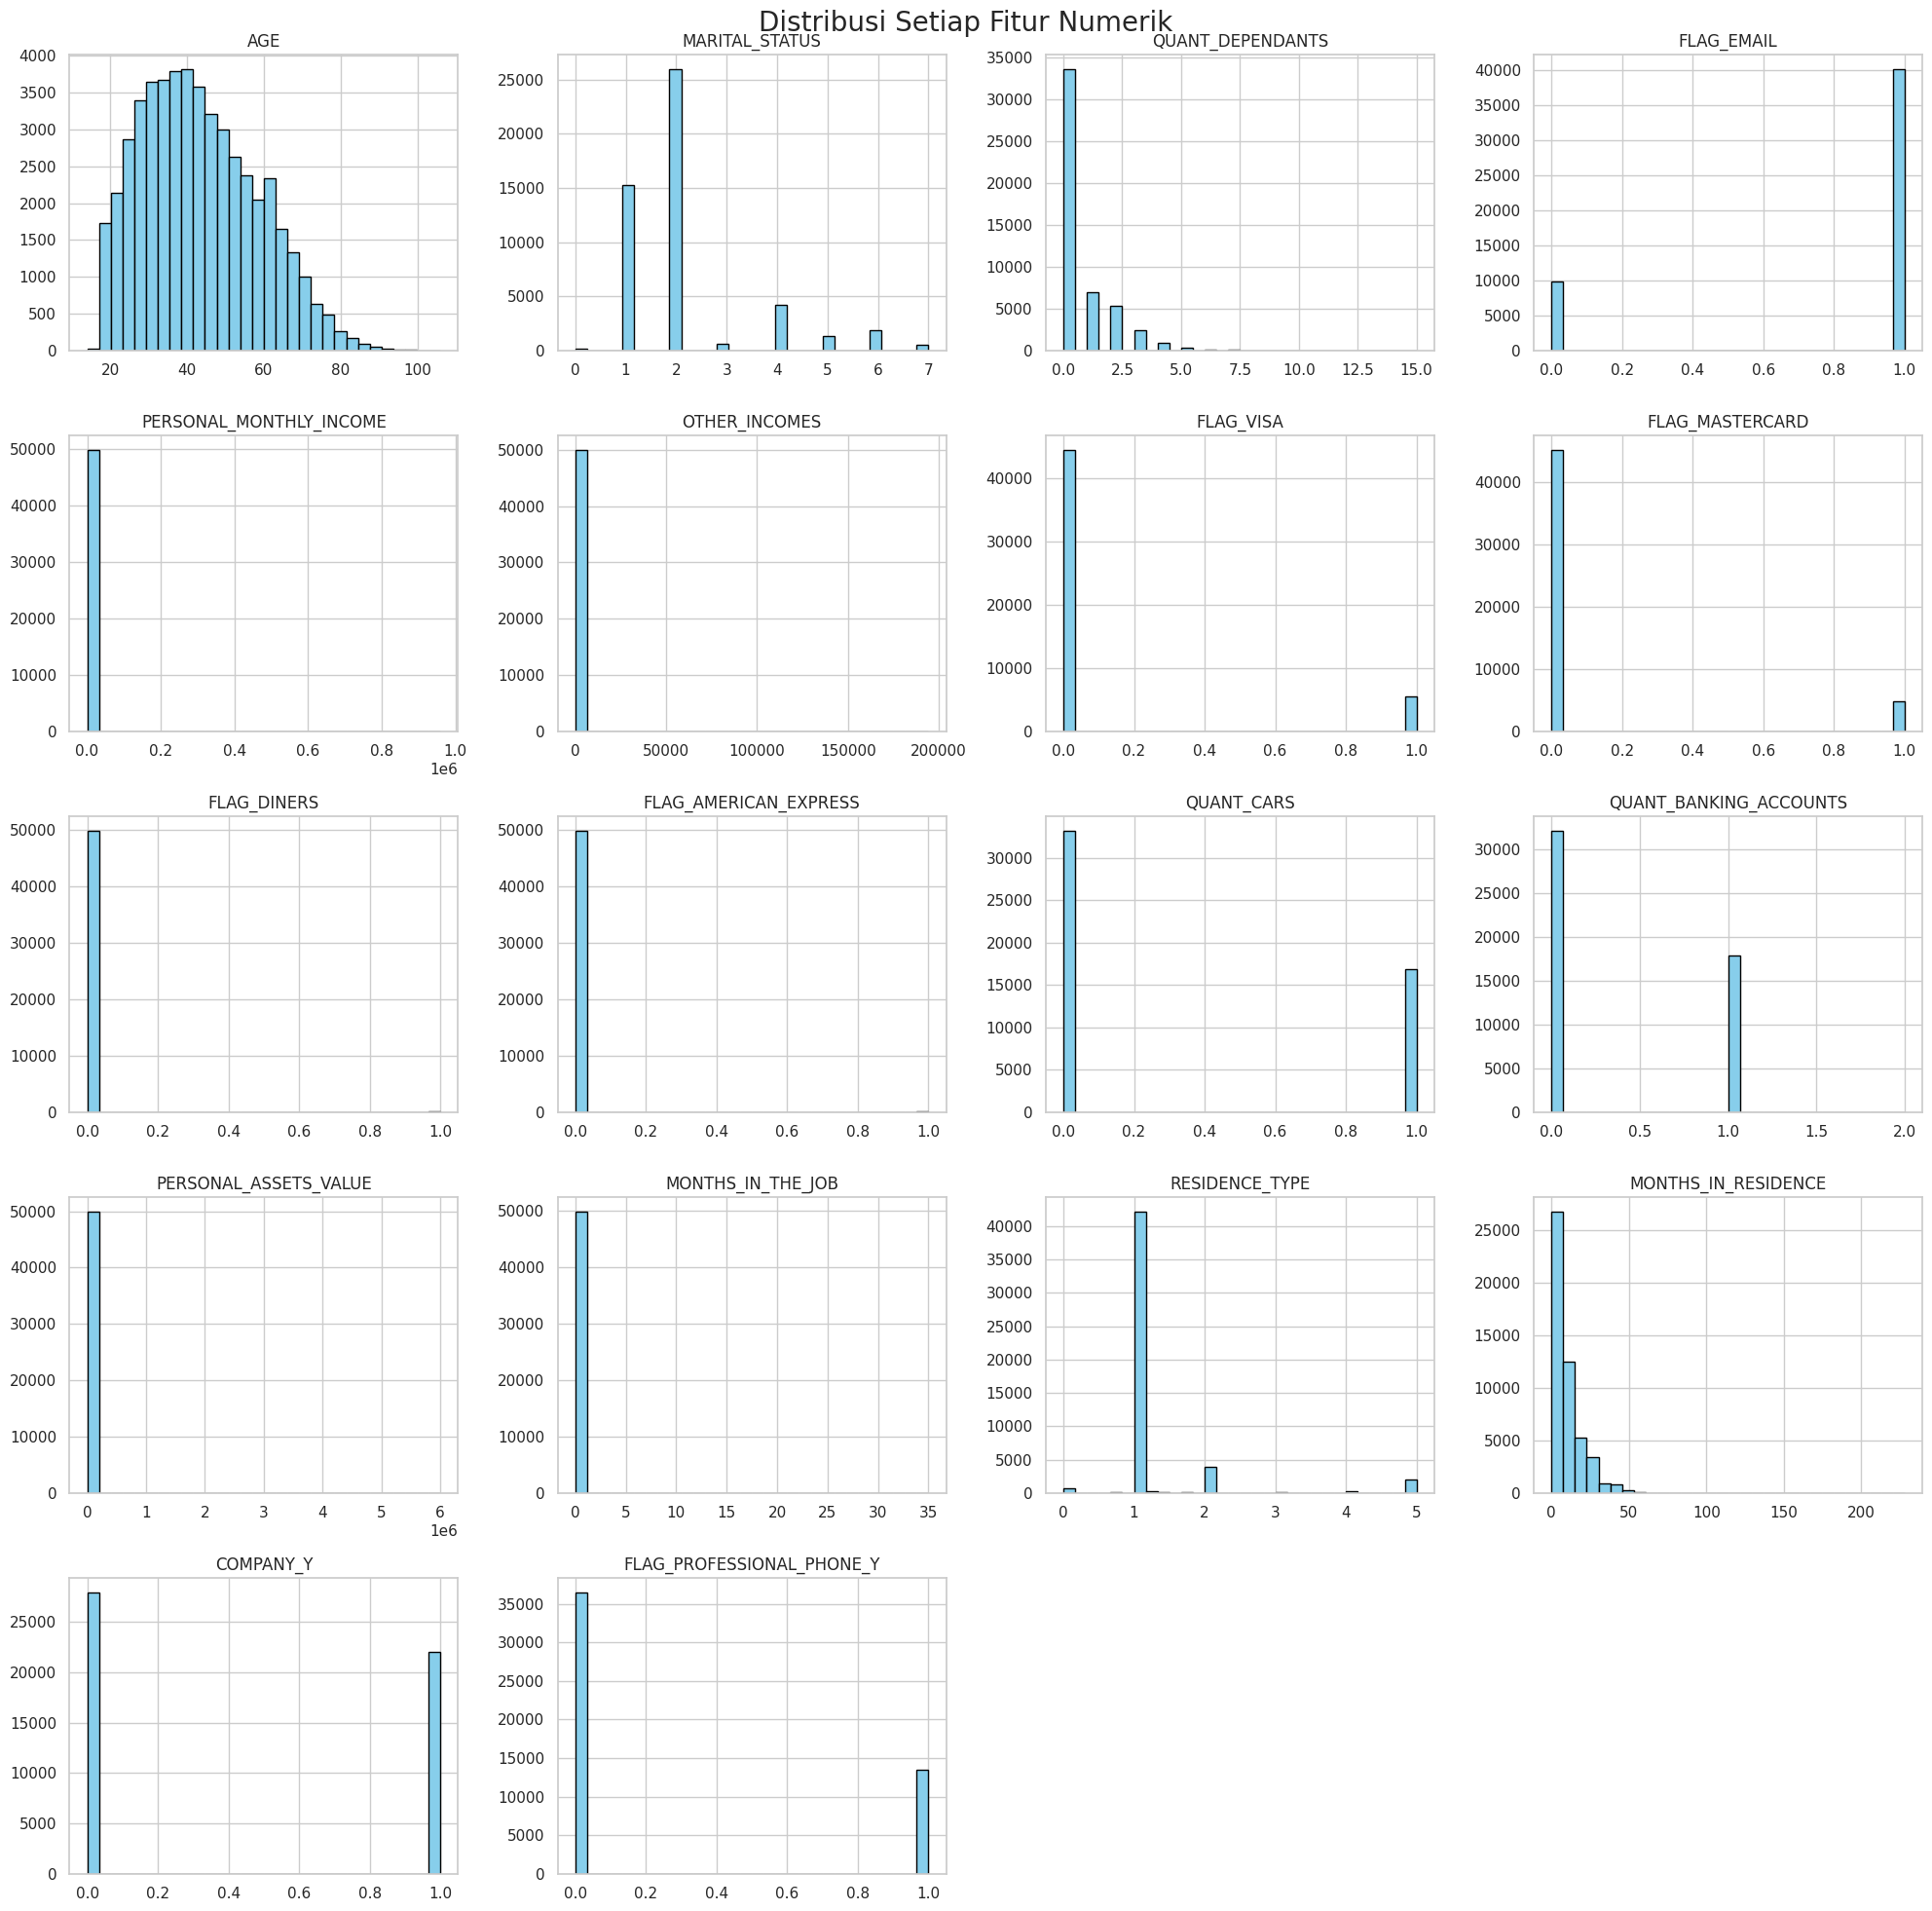

In [ ]:
# Atur style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 5)

# 1. Histogram untuk semua kolom numerik
df_clean_lr[numerical_cols_lr].hist(bins=30, figsize=(20, 20), color='skyblue', edgecolor='black')
plt.suptitle("Distribusi Setiap Fitur Numerik", fontsize=20)
plt.tight_layout()
plt.show()

In [ ]:
df_clean_lr['MARITAL_STATUS'].value_counts().sort_index()

,count
MARITAL_STATUS,
0.0,202
1.0,15286
2.0,25964
3.0,632
4.0,4206
5.0,1296
6.0,1876
7.0,534


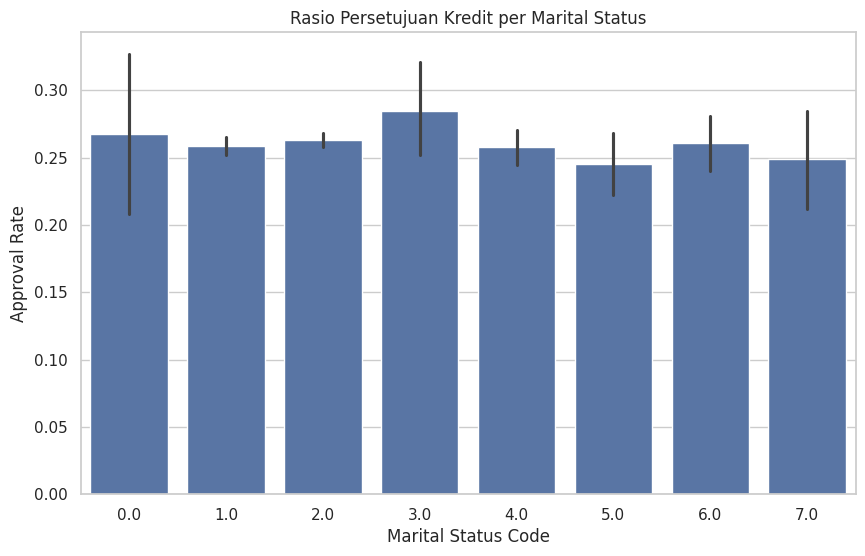

In [ ]:
# Buat plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df_clean_lr, x='MARITAL_STATUS', y='TARGET_LABEL_BAD.1', estimator=lambda x: sum(x)/len(x))
plt.title('Rasio Persetujuan Kredit per Marital Status')
plt.ylabel('Approval Rate')
plt.xlabel('Marital Status Code')
plt.show()


In [ ]:
# Buat tabel kontingensi
contingency_table = pd.crosstab(df_clean_lr['MARITAL_STATUS'], df_clean_lr['TARGET_LABEL_BAD.1'])

# Lakukan uji chi-square
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square statistic: {chi2}")
print(f"P-value: {p}")


Chi-Square statistic: 5.156646952763989
P-value: 0.6408534927436402


In [ ]:
df_clean_lr['MARITAL_STATUS'] = df_clean_lr['MARITAL_STATUS'].astype('category')

In [ ]:
df_clean_lr['QUANT_DEPENDANTS'].value_counts().sort_index()

,count
QUANT_DEPENDANTS,
0.0,33653
1.0,7003
2.0,5363
3.0,2465
4.0,860
5.0,365
6.0,139
7.0,65
8.0,35


In [ ]:
df_clean_lr['PERSONAL_MONTHLY_INCOME'].describe()

,PERSONAL_MONTHLY_INCOME
count,49996.000000
mean,886.690352
std,7847.272569
min,60.000000
25%,360.000000
50%,500.000000
75%,800.000000
max,959000.000000


In [ ]:
df_clean_lr['PERSONAL_MONTHLY_INCOME'].describe()
df_clean_lr['PERSONAL_MONTHLY_INCOME'].quantile([0.95, 0.99, 0.999])

,PERSONAL_MONTHLY_INCOME
0.950,1802.2500
0.990,3678.3735
0.999,43727.8100


In [ ]:
df_clean_lr['PERSONAL_MONTHLY_INCOME'].value_counts()

,count
PERSONAL_MONTHLY_INCOME,
350.00,6898
500.00,1453
400.00,1402
380.00,1362
600.00,1197
...,...
738.80,1
2289.00,1
1074.08,1


In [ ]:
# Step 1: Winsorizing (1% kiri-kanan)
df_clean_lr['PERSONAL_MONTHLY_INCOME'] = winsorize(df_clean_lr['PERSONAL_MONTHLY_INCOME'], limits=[0.01, 0.01])

# # Step 2: Log transform
# df_clean_lr['PERSONAL_MONTHLY_INCOME'] = np.log1p(df_clean_lr['PERSONAL_MONTHLY_INCOME'])

In [ ]:
df_clean_lr['OTHER_INCOMES'].describe()

,OTHER_INCOMES
count,49996.000000
mean,35.437595
std,891.550749
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,194344.000000


In [ ]:
df_clean_lr['OTHER_INCOMES'].value_counts()

,count
OTHER_INCOMES,
0.00,47223
350.00,359
200.00,150
300.00,143
400.00,136
...,...
433.58,1
545.00,1
747.31,1


In [ ]:

# # Winsorize 1% kanan (karena 0 semua di kiri)
# df['OTHER_INCOMES_WINSOR'] = winsorize(df['OTHER_INCOMES'], limits=[0.0, 0.01])

# Lalu log transform
df_clean_lr['OTHER_INCOMES'] = np.log1p(df_clean_lr['OTHER_INCOMES'])

In [ ]:
df_clean_lr['MONTHS_IN_THE_JOB'].value_counts()

,count
MONTHS_IN_THE_JOB,
0.0,49920
2.0,18
1.0,15
3.0,12
5.0,6
4.0,4
6.0,2
14.0,2
12.0,2


In [ ]:
# df_clean_lr['MONTHS_IN_THE_JOB'] = (df_clean_lr['MONTHS_IN_THE_JOB'] > 0).astype(int)

In [ ]:
# df_clean_lr['MONTHS_IN_THE_JOB'].min()

0.0

In [ ]:
df_clean_lr['MONTHS_IN_JOB'] = np.log1p(df_clean_lr['MONTHS_IN_THE_JOB'])

In [ ]:
df_clean_lr['MONTHS_IN_RESIDENCE'].value_counts().sort_index()

,count
MONTHS_IN_RESIDENCE,
0.0,4694
0.6,4
0.8,4
1.0,7346
1.2,9
...,...
99.0,1
100.0,1
101.0,1


In [ ]:
df_clean_lr['MONTHS_IN_RESIDENCE'].describe()

,MONTHS_IN_RESIDENCE
count,49996.000000
mean,9.697904
std,10.338385
min,0.000000
25%,2.000000
50%,6.000000
75%,15.000000
max,228.000000


In [ ]:
df_clean_lr['MONTHS_IN_RESIDENCE'] = df_clean_lr['MONTHS_IN_RESIDENCE'].round()

In [ ]:
df_clean_lr['MONTHS_IN_RESIDENCE'] = df_clean_lr['MONTHS_IN_RESIDENCE'].astype('category')

In [ ]:
df['PERSONAL_ASSETS_VALUE'].value_counts()

,count
PERSONAL_ASSETS_VALUE,
0.0,47609
30000.0,222
25000.0,198
50000.0,196
15000.0,185
...,...
5000000.0,1
220000.0,1
53000.0,1


In [ ]:
df_clean_lr['PERSONAL_ASSETS_VALUE'].describe()

,PERSONAL_ASSETS_VALUE
count,4.999600e+04
mean,2.321658e+03
std,4.235925e+04
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,0.000000e+00
max,6.000000e+06


In [ ]:
df_clean_lr['PERSONAL_ASSETS_VALUE'].min()

0.0

In [ ]:
df_clean_lr['PERSONAL_ASSETS_VALUE'] = np.log1p(df_clean_lr['PERSONAL_ASSETS_VALUE'])

In [ ]:
df_clean_lr['QUANT_CARS'].value_counts()

,count
QUANT_CARS,
0.0,33190
1.0,16806


In [ ]:
df_clean_lr['QUANT_BANKING_ACCOUNTS'].value_counts()

,count
QUANT_BANKING_ACCOUNTS,
0.0,32120
1.0,17862
2.0,14


In [ ]:
# df_clean_lr['QUANT_BANKING_ACCOUNTS'] = df_clean_lr['QUANT_BANKING_ACCOUNTS'].apply(lambda x: 1 if x > 0 else 0)

In [ ]:
df_clean_lr['FLAG_EMAIL'].value_counts()

,count
FLAG_EMAIL,
1.0,40111
0.0,9885


In [ ]:
df_clean_lr['FLAG_VISA'].value_counts()

,count
FLAG_VISA,
0.0,44426
1.0,5570


In [ ]:
df_clean_lr['FLAG_AMERICAN_EXPRESS'].value_counts()

,count
FLAG_AMERICAN_EXPRESS,
0.0,49909
1.0,87


In [ ]:
df_clean_lr['FLAG_DINERS'].value_counts()

,count
FLAG_DINERS,
0.0,49930
1.0,66


In [ ]:
df_clean_lr['FLAG_MASTERCARD'].value_counts()

,count
FLAG_MASTERCARD,
0.0,45124
1.0,4872


In [ ]:
df_clean_lr.columns

Index(['AGE', 'MARITAL_STATUS', 'QUANT_DEPENDANTS', 'FLAG_EMAIL',
       'PERSONAL_MONTHLY_INCOME', 'OTHER_INCOMES', 'FLAG_VISA',
       'FLAG_MASTERCARD', 'FLAG_DINERS', 'FLAG_AMERICAN_EXPRESS', 'QUANT_CARS',
       'QUANT_BANKING_ACCOUNTS', 'PERSONAL_ASSETS_VALUE', 'MONTHS_IN_THE_JOB',
       'RESIDENCE_TYPE', 'MONTHS_IN_RESIDENCE', 'COMPANY_Y',
       'FLAG_PROFESSIONAL_PHONE_Y', 'TARGET_LABEL_BAD.1'],
      dtype='object')

In [ ]:
df_clean_lr['RESIDENCE_TYPE'].value_counts()

,count
RESIDENCE_TYPE,
1.0,42202
2.0,3936
5.0,1983
0.0,760
4.0,311
1.2,300
1.8,158
3.0,141
1.4,66


In [ ]:
df_clean_lr['RESIDENCE_TYPE'] = df_clean_lr['RESIDENCE_TYPE'].round().astype('int')
df_clean_lr['RESIDENCE_TYPE'] = df_clean_lr['RESIDENCE_TYPE'].astype('category')

In [ ]:
df_clean_lr['RESIDENCE_TYPE'] = df_clean_lr['RESIDENCE_TYPE'].astype('category')

In [ ]:
df_clean_lr['COMPANY_Y'].value_counts()

,count
COMPANY_Y,
0.0,27957
1.0,22039


In [ ]:
df_clean_lr['FLAG_PROFESSIONAL_PHONE_Y'].value_counts()

,count
FLAG_PROFESSIONAL_PHONE_Y,
0.0,36508
1.0,13488


In [ ]:
df_clean_lr.columns

Index(['AGE', 'MARITAL_STATUS', 'QUANT_DEPENDANTS', 'FLAG_EMAIL',
       'PERSONAL_MONTHLY_INCOME', 'OTHER_INCOMES', 'FLAG_VISA',
       'FLAG_MASTERCARD', 'FLAG_DINERS', 'FLAG_AMERICAN_EXPRESS', 'QUANT_CARS',
       'QUANT_BANKING_ACCOUNTS', 'PERSONAL_ASSETS_VALUE', 'MONTHS_IN_THE_JOB',
       'RESIDENCE_TYPE', 'MONTHS_IN_RESIDENCE', 'COMPANY_Y',
       'FLAG_PROFESSIONAL_PHONE_Y', 'TARGET_LABEL_BAD.1'],
      dtype='object')

In [ ]:
#add the target variable back
# target columns will stick on the original DF
target_variable='TARGET_LABEL_BAD.1'
df_clean_lr[target_variable]=df[target_variable]

#calculation the correlation numeric and target
cor=df_clean_lr.corr()[target_variable].sort_values(ascending=False)

cor_df=pd.DataFrame(cor).reset_index()
cor_df.rename(columns={'index':'Feature',target_variable:'Correlation with target'})
cor_df

,index,TARGET_LABEL_BAD.1
0,TARGET_LABEL_BAD.1,1.000000
1,FLAG_OTHER_CARDS,0.007465
2,MONTHS_IN_JOB,0.007001
3,MONTHS_IN_THE_JOB,0.006587
4,FLAG_PROFESSIONAL_PHONE_N,0.005770
5,FLAG_EMAIL,0.005537
6,RESIDENCE_TYPE,0.003585
7,FLAG_DINERS,0.003493
8,MONTHS_IN_RESIDENCE,0.003160
9,PERSONAL_MONTHLY_INCOME,0.002924


In [ ]:
df_clean_lr.columns

Index(['AGE', 'MARITAL_STATUS', 'QUANT_DEPENDANTS', 'FLAG_EMAIL',
       'PERSONAL_MONTHLY_INCOME', 'OTHER_INCOMES', 'FLAG_VISA',
       'FLAG_MASTERCARD', 'FLAG_DINERS', 'FLAG_AMERICAN_EXPRESS', 'QUANT_CARS',
       'QUANT_BANKING_ACCOUNTS', 'PERSONAL_ASSETS_VALUE', 'MONTHS_IN_THE_JOB',
       'RESIDENCE_TYPE', 'MONTHS_IN_RESIDENCE', 'COMPANY_Y',
       'FLAG_PROFESSIONAL_PHONE_Y', 'TARGET_LABEL_BAD.1'],
      dtype='object')

Prepocessing Data

In [ ]:
# Define a function for log transformation (np.log1p handles 0 values safely)
def log_transform(X):
    return np.log1p(X)


# Daftar fitur berdasarkan jenisnya
num_features = [
    "AGE", "PERSONAL_MONTHLY_INCOME", "PERSONAL_ASSETS_VALUE",  "QUANT_DEPENDANTS", "OTHER_INCOMES",
    "MONTHS_IN_RESIDENCE", "MONTHS_IN_THE_JOB",  "QUANT_BANKING_ACCOUNTS"
]

cat_features = [
    "MARITAL_STATUS", "RESIDENCE_TYPE"
]

binary_features = [
    "FLAG_EMAIL", "FLAG_VISA", "FLAG_MASTERCARD", "FLAG_DINERS",
    "FLAG_AMERICAN_EXPRESS", "COMPANY_Y",
    "FLAG_PROFESSIONAL_PHONE_Y", "QUANT_CARS"
]


# Numerik
numeric_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("log_transformer", FunctionTransformer(lambda x: np.log1p(x), validate=True)),
    ("scaler", RobustScaler())
])

# Kategorikal
categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

# Binary -> tidak diubah
binary_pipeline = "passthrough"

preprocessor = ColumnTransformer([
    ("num", numeric_pipeline, num_features),
    ("cat", categorical_pipeline, cat_features),
    ("bin", binary_pipeline, binary_features)
])


In [ ]:
## process data

#untuk nge drop baris uang ada nan di target variable
df_clean_lr=df_clean_lr.dropna(subset=['TARGET_LABEL_BAD.1'])
X=df_clean_lr.drop('TARGET_LABEL_BAD.1',axis=1)
y=df_clean_lr['TARGET_LABEL_BAD.1']

In [ ]:
#split
X_train_lr, X_test_lr, y_train_lr ,y_test_lr =train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)

In [ ]:
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=100, class_weight='balanced'))
])

In [ ]:
model_pipeline.fit(X_train_lr, y_train_lr)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('log_transformer',
                                                                   FunctionTransformer(func=<function <lambda> at 0x79cfc385b100>,
                                                                                       validate=True)),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['AGE',
                                                   'PERSONAL_MONTHLY_INCOME',
                                                   'PERSONAL_ASSETS_VALUE',
                                                   'QUANT_DEPENDANTS',
                                                   'OTHER_INCOMES',
                                                   'MONTHS_IN_RESIDENCE...
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['MARITAL_STATUS',
                                                   'RESIDENCE_TYPE']),
                                                 ('bin', 'passthrough',
                                                  ['FLAG_EMAIL', 'FLAG_VISA',
                                                   'FLAG_MASTERCARD',
                                                   'FLAG_DINERS',
                                                   'FLAG_AMERICAN_EXPRESS',
                                                   'COMPANY_Y',
                                                   'FLAG_PROFESSIONAL_PHONE_Y',
                                                   'QUANT_CARS'])])),
                ('classifier', LogisticRegression(class_weight='balanced'))])

In [ ]:
#overfitting test
# Prediksi data training
y_pred_train_lr = model_pipeline.predict(X_train_lr)

# Prediksi data testing
y_pred_test_lr = model_pipeline.predict(X_test_lr)

# Akurasi training
acc_lr_base_train = accuracy_score(y_train_lr, y_pred_train_lr)

# Akurasi testing
acc_lr_base = accuracy_score(y_test_lr, y_pred_test_lr)

# Cetak hasil
print(f'training accuracy: {acc_lr_base_train}')
print(f'testing accuracy: {acc_lr_base}')


training accuracy: 0.49241363545446754
testing accuracy: 0.48496566437762517


In [ ]:
print("Train Classification Report:\n", classification_report(y_train_lr, y_pred_train_lr))
print("Test Classification Report:\n", classification_report(y_test_lr, y_pred_test_lr))

print("Train Confusion Matrix:\n", confusion_matrix(y_train_lr, y_pred_train_lr))
print("Test Confusion Matrix:\n", confusion_matrix(y_test_lr, y_pred_test_lr))


Train Classification Report:
               precision    recall  f1-score   support

         0.0       0.75      0.47      0.58     25868
         1.0       0.27      0.54      0.36      9129

    accuracy                           0.49     34997
   macro avg       0.51      0.51      0.47     34997
weighted avg       0.62      0.49      0.52     34997

Test Classification Report:
               precision    recall  f1-score   support

         0.0       0.74      0.47      0.57     11087
         1.0       0.26      0.53      0.35      3912

    accuracy                           0.48     14999
   macro avg       0.50      0.50      0.46     14999
weighted avg       0.61      0.48      0.52     14999

Train Confusion Matrix:
 [[12272 13596]
 [ 4168  4961]]
Test Confusion Matrix:
 [[5216 5871]
 [1854 2058]]


In [ ]:
y_proba_test = model_pipeline.predict_proba(X_test_lr)[:, 1]
print("ROC-AUC Score (test):", roc_auc_score(y_test_lr, y_proba_test))


ROC-AUC Score (test): 0.5003573705861966


In [ ]:
# Definisikan model_pipeline Anda (sudah ada di kode Anda)
# model_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', LogisticRegression(...))])

# Definisikan parameter yang akan dicari
param_grid = {
    'classifier__C': np.logspace(-3, 3, 7), # Contoh: [0.001, 0.01, 0.1, 1, 10, 100, 1000]
    'classifier__penalty': ['l1', 'l2'] # Coba juga L2
}

# Gunakan StratifiedKFold untuk cross-validation agar menjaga proporsi kelas
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    model_pipeline,
    param_grid,
    cv=cv,
    scoring='f1', # Fokus pada F1-score untuk kelas minoritas
    n_jobs=-1,    # Gunakan semua core CPU
    verbose=2
)

grid_search.fit(X_train_lr, y_train_lr)

print("Best parameters:", grid_search.best_params_)
print("Best F1-score:", grid_search.best_score_)

# Latih model terbaik pada seluruh data training
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test_lr)
print("Test Classification Report (Tuned):")
print(classification_report(y_test_lr, y_pred_tuned))

Fitting 5 folds for each of 14 candidates, totalling 70 fits
Best parameters: {'classifier__C': np.float64(0.001), 'classifier__penalty': 'l2'}
Best F1-score: 0.3576807683632456
Test Classification Report (Tuned):
              precision    recall  f1-score   support

         0.0       0.74      0.42      0.54     11087
         1.0       0.26      0.58      0.36      3912

    accuracy                           0.46     14999
   macro avg       0.50      0.50      0.45     14999
weighted avg       0.61      0.46      0.49     14999



In [ ]:
# Ambil transformer yang sudah fit
ct = model_pipeline.named_steps['preprocessor']


# Fitur numerik
num_names = ct.named_transformers_['num'].get_feature_names_out(num_features)

# Fitur kategorikal
cat_names = ct.named_transformers_['cat'].get_feature_names_out(cat_features)

# Fitur biner (passthrough)
bin_names = binary_features

# Gabung semua
all_feature_names = np.concatenate([num_names, cat_names, bin_names])
print(all_feature_names)

['AGE' 'PERSONAL_MONTHLY_INCOME' 'PERSONAL_ASSETS_VALUE'
 'MARITAL_STATUS_0.0' 'MARITAL_STATUS_1.0' 'MARITAL_STATUS_2.0'
 'MARITAL_STATUS_3.0' 'MARITAL_STATUS_4.0' 'MARITAL_STATUS_5.0'
 'MARITAL_STATUS_6.0' 'MARITAL_STATUS_7.0' 'RESIDENCE_TYPE_0'
 'RESIDENCE_TYPE_1' 'RESIDENCE_TYPE_2' 'RESIDENCE_TYPE_3'
 'RESIDENCE_TYPE_4' 'RESIDENCE_TYPE_5' 'QUANT_DEPENDANTS_0'
 'QUANT_DEPENDANTS_1' 'QUANT_DEPENDANTS_2' 'QUANT_DEPENDANTS_3'
 'QUANT_DEPENDANTS_4+' 'MONTHS_IN_RESIDENCE_1-3yr'
 'MONTHS_IN_RESIDENCE_3-6yr' 'MONTHS_IN_RESIDENCE_6+yr'
 'MONTHS_IN_RESIDENCE_6-12mo' 'MONTHS_IN_RESIDENCE_≤6mo' 'FLAG_EMAIL'
 'FLAG_VISA' 'FLAG_MASTERCARD' 'FLAG_DINERS' 'FLAG_AMERICAN_EXPRESS'
 'FLAG_OTHER_CARDS' 'COMPANY_Y' 'FLAG_PROFESSIONAL_PHONE_Y'
 'OTHER_INCOMES' 'QUANT_BANKING_ACCOUNTS' 'MONTHS_IN_THE_JOB' 'QUANT_CARS']


In [ ]:
# Misalnya kamu sudah punya preprocessor
# preprocessor = ColumnTransformer([...])

ros = RandomOverSampler(random_state=42)

model = LogisticRegression(max_iter=1000, random_state=42)

model_pipeline_ros = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('ros', ros),
    ('classifier', model)
])


In [ ]:
model_pipeline_ros.fit(X_train_lr, y_train_lr)

# Prediksi
y_pred_train = model_pipeline_ros.predict(X_train_lr)
y_pred_test = model_pipeline_ros.predict(X_test_lr)

# Evaluasi
print("Train Accuracy:", accuracy_score(y_train_lr, y_pred_train))
print("Test Accuracy:", accuracy_score(y_test_lr, y_pred_test))

print("\nClassification Report (Test):")
print(classification_report(y_test_lr, y_pred_test))

# ROC AUC
y_proba = model_pipeline_ros.predict_proba(X_test_lr)[:, 1]
print("ROC AUC:", roc_auc_score(y_test_lr, y_proba))


Train Accuracy: 0.4970426036517416
Test Accuracy: 0.48683245549703313

Classification Report (Test):
              precision    recall  f1-score   support

         0.0       0.74      0.47      0.58     11087
         1.0       0.26      0.52      0.35      3912

    accuracy                           0.49     14999
   macro avg       0.50      0.50      0.46     14999
weighted avg       0.61      0.49      0.52     14999

ROC AUC: 0.5026837839338358


In [ ]:
# Pipeline dengan SMOTE
model_pipeline_smote = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("smote", SMOTE(random_state=42)),
    ("model", LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42))
])


In [ ]:
# Fit ke data latih
model_pipeline_smote.fit(X_train_lr, y_train_lr)

# Prediksi
y_pred_train = model_pipeline_smote.predict(X_train_lr)
y_pred_test = model_pipeline_smote.predict(X_test_lr)

# Evaluasi
print("Train Accuracy:", accuracy_score(y_train_lr, y_pred_train))
print("Test Accuracy:", accuracy_score(y_test_lr, y_pred_test))

print("\nClassification Report (Test):")
print(classification_report(y_test_lr, y_pred_test))

# ROC AUC

y_proba_test = model_pipeline_smote.predict_proba(X_test_lr)[:, 1]
print("ROC AUC:", roc_auc_score(y_test_lr, y_proba_test))

Train Accuracy: 0.47246906877732375
Test Accuracy: 0.46803120208013865

Classification Report (Test):
              precision    recall  f1-score   support

         0.0       0.74      0.43      0.54     11087
         1.0       0.26      0.57      0.36      3912

    accuracy                           0.47     14999
   macro avg       0.50      0.50      0.45     14999
weighted avg       0.62      0.47      0.50     14999

ROC AUC: 0.5027226105188135


In [ ]:
# Pipeline
pipeline_ros_reg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('ros', RandomOverSampler(random_state=42)),
    ('model', LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42))
])

# Grid search parameter regulasi
param_grid = {
    'model__C': [0.01, 0.1, 0.5, 1, 5, 10]
}

# GridSearchCV
grid_search_ros = GridSearchCV(
    pipeline_ros_reg,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit
grid_search_ros.fit(X_train_lr, y_train_lr)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          RobustScaler())]),
                                                                         ['AGE',
                                                                          'PERSONAL_MONTHLY_INCOME',
                                                                          'PERSONAL_ASSETS_VALUE']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('encoder',
                                                                                          OneHotEncoder(handle_unknown='igno...
                                                                          'FLAG_OTHER_CARDS',
                                                                          'COMPANY_Y',
                                                                          'FLAG_PROFESSIONAL_PHONE_Y',
                                                                          'OTHER_INCOMES',
                                                                          'QUANT_BANKING_ACCOUNTS',
                                                                          'MONTHS_IN_THE_JOB',
                                                                          'QUANT_CARS'])])),
                                       ('ros',
                                        RandomOverSampler(random_state=42)),
                                       ('model',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=1000,
                                                           random_state=42))]),
             n_jobs=-1, param_grid={'model__C': [0.01, 0.1, 0.5, 1, 5, 10]},
             scoring='roc_auc', verbose=1)

In [ ]:
# Hasil terbaik
print("Best C:", grid_search_ros.best_params_)
print("Best ROC AUC (CV):", grid_search_ros.best_score_)

Best C: {'model__C': 0.01}
Best ROC AUC (CV): 0.5028079908828296


In [ ]:
# Prediksi di test set
y_pred_test_ros = grid_search_ros.predict(X_test_lr)
y_proba_test_ros = grid_search_ros.predict_proba(X_test_lr)[:, 1]

print("Test Accuracy:", accuracy_score(y_test_lr, y_pred_test_ros))
print("ROC AUC:", roc_auc_score(y_test_lr, y_proba_test_ros))
print("Classification Report:")
print(classification_report(y_test_lr, y_pred_test_ros))


Test Accuracy: 0.4889659310620708
ROC AUC: 0.5023129946585316
Classification Report:
              precision    recall  f1-score   support

         0.0       0.74      0.48      0.58     11087
         1.0       0.26      0.52      0.35      3912

    accuracy                           0.49     14999
   macro avg       0.50      0.50      0.46     14999
weighted avg       0.61      0.49      0.52     14999



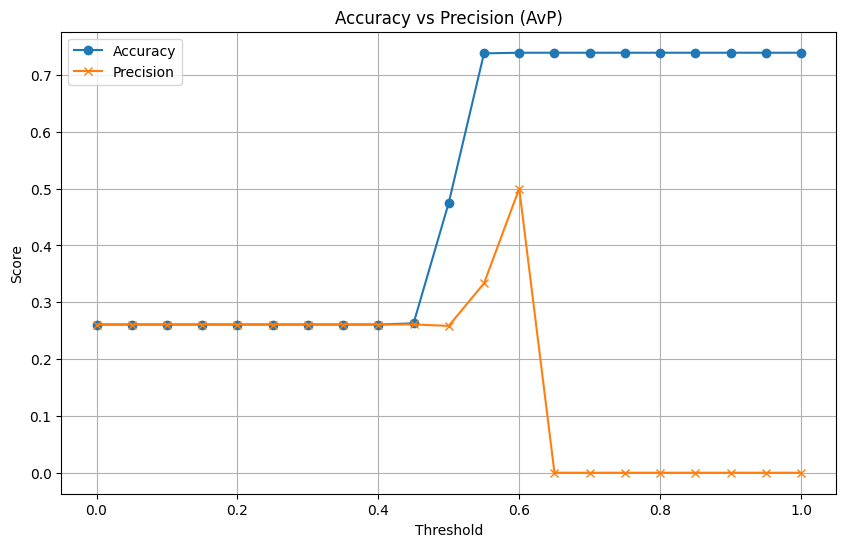

In [ ]:
# Threshold dari 0.0 sampai 1.0
thresholds = np.arange(0.0, 1.05, 0.05)
accuracies = []
precisions = []

# Dapatkan probabilitas prediksi (kelas positif)
y_proba = model_pipeline.predict_proba(X_test_lr)[:, 1]

for t in thresholds:
    y_pred_thresh = (y_proba >= t).astype(int)

    acc = accuracy_score(y_test_lr, y_pred_thresh)
    prec = precision_score(y_test_lr, y_pred_thresh, zero_division=0)

    accuracies.append(acc)
    precisions.append(prec)

# Plot Accuracy vs Precision
plt.figure(figsize=(10, 6))
plt.plot(thresholds, accuracies, label='Accuracy', marker='o')
plt.plot(thresholds, precisions, label='Precision', marker='x')
plt.title('Accuracy vs Precision (AvP)')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()


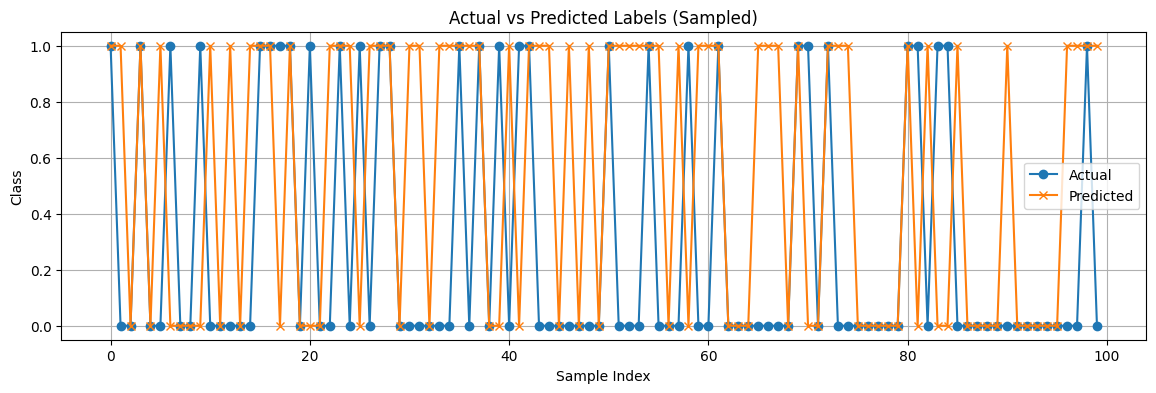

In [ ]:
# Ambil 100 sampel acak
sample_size = 100
idx = np.random.choice(len(y_test_lr), size=sample_size, replace=False)

# Ambil actual dan prediksi berdasarkan posisi
actual = y_test_lr.iloc[idx]
predicted = y_pred_test_lr[idx]

# Visualisasi Actual vs Predicted
plt.figure(figsize=(14, 4))
plt.plot(actual.values, label='Actual', marker='o')
plt.plot(predicted, label='Predicted', marker='x')
plt.title('Actual vs Predicted Labels (Sampled)')
plt.xlabel('Sample Index')
plt.ylabel('Class')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Misal df_clean_lr adalah dataframe kamu dan 'TARGET_LABEL_BAD.1' adalah target
X = df_clean_lr.drop(columns=['TARGET_LABEL_BAD.1'])
y = df_clean_lr['TARGET_LABEL_BAD.1']

# Tambahkan konstanta untuk intercept
X_const = sm.add_constant(X)

# Fit model
logit_model = sm.Logit(y, X_const)
result = logit_model.fit()

# Tampilkan ringkasan
print(result.summary())

# Ekstrak summary ke DataFrame
summary_df = result.summary2().tables[1]

# Filter fitur tidak signifikan (p-value > 0.05)
insignificant = summary_df[summary_df['P>|z|'] > 0.05]

# Filter fitur dengan koefisien kecil (misalnya < 0.01)
small_coef = summary_df[np.abs(summary_df['Coef.']) < 0.01]

# Tampilkan
print("\n Fitur dengan p-value > 0.05 (tidak signifikan):")
print(insignificant)

print("\n Fitur dengan koefisien absolut < 0.01:")
print(small_coef)

# Daftar fitur yang bisa dipertimbangkan untuk dihapus (gabungan keduanya, kecuali const)
to_drop = insignificant.index.union(small_coef.index).difference(['const'])
print("\n🗑️ Rekomendasi fitur untuk dipertimbangkan dibuang:")
print(to_drop.tolist())

Optimization terminated successfully.
         Current function value: 0.573712
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:     TARGET_LABEL_BAD.1   No. Observations:                49996
Model:                          Logit   Df Residuals:                    49975
Method:                           MLE   Df Model:                           20
Date:                Mon, 14 Jul 2025   Pseudo R-squ.:               0.0003886
Time:                        12:49:34   Log-Likelihood:                -28683.
converged:                       True   LL-Null:                       -28694.
Covariance Type:            nonrobust   LLR p-value:                    0.3243
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -0.5368        nan        nan     

In [ ]:
features_to_drop = [
    'AGE', 'FLAG_AMERICAN_EXPRESS', 'FLAG_DINERS', 'FLAG_EMAIL', 'FLAG_MASTERCARD',
    'FLAG_OTHER_CARDS', 'FLAG_VISA', 'MARITAL_STATUS_0', 'MONTHS_IN_JOB',
    'MONTHS_IN_RESIDENCE', 'MONTHS_IN_THE_JOB', 'OTHER_INCOMES', 'PERSONAL_ASSETS_VALUE',
    'PERSONAL_MONTHLY_INCOME', 'QUANT_BANKING_ACCOUNTS', 'QUANT_CARS', 'QUANT_DEPENDANTS',
    'QUANT_SPECIAL_BANKING_ACCOUNTS', 'RESIDENCE_TYPE_1.0', 'RESIDENCE_TYPE_2.0',
    'RESIDENCE_TYPE_3.0', 'RESIDENCE_TYPE_4.0', 'RESIDENCE_TYPE_5.0'
]


In [ ]:
# 1. Siapkan data
df_reduced = df_clean_lr.drop(columns=features_to_drop, errors='ignore')
X = df_reduced.drop(columns=['TARGET_LABEL_BAD.1'])
y = df_reduced['TARGET_LABEL_BAD.1']

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

# 3. Fit Logistic Regression (pakai class_weight='balanced')
model = LogisticRegression(max_iter=1000, class_weight='balanced', solver='liblinear')
model.fit(X_train, y_train)

# 4. Evaluasi
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print("📊 Classification Report:\n", classification_report(y_test, y_pred))
print("🔁 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("🚀 ROC AUC Score:", roc_auc_score(y_test, y_prob))

📊 Classification Report:
               precision    recall  f1-score   support

         0.0       0.74      0.37      0.49     11087
         1.0       0.26      0.63      0.37      3912

    accuracy                           0.44     14999
   macro avg       0.50      0.50      0.43     14999
weighted avg       0.61      0.44      0.46     14999

🔁 Confusion Matrix:
 [[4095 6992]
 [1455 2457]]
🚀 ROC AUC Score: 0.49981609248510983


In [ ]:
# 1. Siapkan data (dari df_reduced sebelumnya)
X = df_reduced.drop(columns=['TARGET_LABEL_BAD.1'])
y = df_reduced['TARGET_LABEL_BAD.1']

# 2. Train-test split (sebelum SMOTE)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

# 3. Feature scaling (logistic regression sensitif terhadap skala)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Terapkan SMOTE hanya ke data latih
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

print("Jumlah data sebelum SMOTE:", y_train.value_counts().to_dict())
print("Jumlah data sesudah SMOTE:", y_train_res.sum(), "/", len(y_train_res))

# 5. Latih logistic regression
model = LogisticRegression(max_iter=1000, solver='liblinear')
model.fit(X_train_res, y_train_res)

# 6. Evaluasi
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

print("📊 Classification Report:\n", classification_report(y_test, y_pred))
print("🔁 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("🚀 ROC AUC Score:", roc_auc_score(y_test, y_prob))

Jumlah data sebelum SMOTE: {0.0: 25868, 1.0: 9129}
Jumlah data sesudah SMOTE: 25868.0 / 51736
📊 Classification Report:
               precision    recall  f1-score   support

         0.0       0.74      0.38      0.50     11087
         1.0       0.26      0.62      0.37      3912

    accuracy                           0.44     14999
   macro avg       0.50      0.50      0.43     14999
weighted avg       0.61      0.44      0.47     14999

🔁 Confusion Matrix:
 [[4235 6852]
 [1499 2413]]
🚀 ROC AUC Score: 0.4998151702384358


In [ ]:
# Dapatkan probabilitas prediksi
y_scores = model.predict_proba(X_test_scaled)[:, 1]

# Ambil precision, recall, threshold
precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)

# Hitung F1 untuk tiap threshold
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-8)
best_index = np.argmax(f1_scores)
best_threshold = thresholds[best_index]

print(f"📌 Best threshold berdasarkan F1-score: {best_threshold:.2f}")
print(f"F1-score pada threshold itu: {f1_scores[best_index]:.4f}")

📌 Best threshold berdasarkan F1-score: 0.48
F1-score pada threshold itu: 0.4138


In [ ]:
y_pred_optimal = (y_scores >= 0.45).astype(int)

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print("📊 Classification Report:\n", classification_report(y_test, y_pred_optimal))
print("🔁 Confusion Matrix:\n", confusion_matrix(y_test, y_pred_optimal))
print("🚀 ROC AUC Score:", roc_auc_score(y_test, y_scores))  # tetap pakai proba


📊 Classification Report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00     11087
         1.0       0.26      1.00      0.41      3912

    accuracy                           0.26     14999
   macro avg       0.13      0.50      0.21     14999
weighted avg       0.07      0.26      0.11     14999

🔁 Confusion Matrix:
 [[    0 11087]
 [    0  3912]]
🚀 ROC AUC Score: 0.4998151702384358
